# <center>Research Work on Data Part and Theory Part<center>
### <center>Jiahua Song<center>

### This is the research work on research of Research Project on new method of Stochastic Differential Equation Symbolic Regression and Application in Quantitative Finance

### Task: 
    [DONE]1: Homogeneous/Nonhomogeneous method;
    [DONE]2: Influence Method building; 
    [In progress]3: Try some possible generating methods in the spirit of related data-driven papers, determine one method that is explainable and present the experiment in fabricated data and some desired real data; 
    4: Present the experiment in fabricated data and some desired real data;
    5: Determine the Theorems and lemma needed in numerical SDE and SDE. 

# Text Transforming Method

I will use a simple math example to illustrate the transformation of a sentence into a numerical representation (embdedding) using the principle of Transformer Architecture. 

### Example Sentence
Let's take a simple sentence:
```
"I love NLP"
```

### Step 1: Tokenization
First, we tokenize the sentence. For simplicity, we'll use word-level tokenization:
```
Tokens: ["I", "love", "NLP"]
```

### Step 2: Word Embeddings
Each token is mapped to a dense vector using pre-trained word embeddings. Suppose our embedding dimension is 4, and we have the following vectors for each word (these vectors are for illustration purposes only):

```
Embedding("I")    = [0.2, 0.1, 0.4, 0.7]
Embedding("love") = [0.9, 0.3, 0.2, 0.8]
Embedding("NLP")  = [0.4, 0.5, 0.6, 0.1]
```

### Step 3: Positional Encoding
We add positional encodings to these embeddings to incorporate the order information. Suppose our positional encoding vectors are:

```
PosEncoding(1) = [0.1, 0.0, 0.1, 0.0]
PosEncoding(2) = [0.0, 0.1, 0.0, 0.1]
PosEncoding(3) = [0.1, 0.1, 0.1, 0.1]
```

Adding positional encodings to the embeddings:

```
Token 1: [0.2, 0.1, 0.4, 0.7] + [0.1, 0.0, 0.1, 0.0] = [0.3, 0.1, 0.5, 0.7]
Token 2: [0.9, 0.3, 0.2, 0.8] + [0.0, 0.1, 0.0, 0.1] = [0.9, 0.4, 0.2, 0.9]
Token 3: [0.4, 0.5, 0.6, 0.1] + [0.1, 0.1, 0.1, 0.1] = [0.5, 0.6, 0.7, 0.2]
```

### Step 4: Self-Attention Mechanism
Next, we compute the self-attention, $softmax(\frac{QK^T}{\sqrt{d_k}})V$. We need queries $Q$, keys $K$, and values $V$. Assume we use the same matrices for simplicity:

```
Query matrix $W_Q$, Key matrix $W_K$, Value matrix $W_V$:
W_Q = W_K = W_V = Identity matrix (for simplicity)
```

Thus, our queries, keys, and values are the same as the positional encodings added embeddings:

```
Q = K = V = [[0.3, 0.1, 0.5, 0.7],
             [0.9, 0.4, 0.2, 0.9],
             [0.5, 0.6, 0.7, 0.2]]
```

We calculate the attention scores using the dot product of queries and keys, scaled by the square root of the embedding dimension (√4 = 2):

```
Attention scores = Q * K^T / √4
                 = [[0.3, 0.1, 0.5, 0.7] dot [0.3, 0.1, 0.5, 0.7],
                    [0.3, 0.1, 0.5, 0.7] dot [0.9, 0.4, 0.2, 0.9],
                    [0.3, 0.1, 0.5, 0.7] dot [0.5, 0.6, 0.7, 0.2],
                    ... (and so on for other tokens)] / 2

Attention scores = [[1.26, 1.35, 0.82],
                    [1.35, 1.82, 1.30],
                    [0.82, 1.30, 0.94]] / 2

Attention scores = [[0.63, 0.68, 0.41],
                    [0.68, 0.91, 0.65],
                    [0.41, 0.65, 0.47]]
```

Apply softmax to these scores to get the attention weights:

```
Attention weights = softmax(attention scores)
                   ≈ [[0.350 , 0.368 , 0.281],
                      [0.310 , 0.390 , 0.301],
                      [0.300 , 0.382 , 0.318]]

```

We then compute the new representations for each token as a weighted sum of the values:

```
New representations = attention weights * V
                    ≈  [0.350 , 0.368 , 0.281] dot [[0.3, 0.1, 0.5, 0.7],
                       [0.310 , 0.390 , 0.301] dot [0.9, 0.4, 0.2, 0.9],
                       [0.300 , 0.382 , 0.318] dot [0.5, 0.6, 0.7, 0.2]]

New representations ≈ [[0.5767,0.3508,0.4453,0.6324],
                       [0.5945,0.3676,0.4437,0.6282],
                       [0.5928,0.3736,0.449,0.6174]]
```
Explain: When you compute the attention scores by taking the dot product of the queries and keys, and then applying a softmax, you get the attention weights.These attention weights indicate how much focus each token should give to every other token. By applying these weights to the values, the model constructs a new representation for each token that incorporates contextual information from other relevant tokens.

### Step 5: Feed-Forward Network and Residual Connections
Each of these new representations is then passed through a feed-forward neural network layer and added with the original representations (residual connections) for stabilization that means in case we encounter the weights near 0, we still make gradient to flow and the original information of tokens has been directly captured. Suppose for simplicity FFN=I.

```
Final representation for token 1:
FFN([0.5767,0.3508,0.4453,0.6324]) + [0.3, 0.1, 0.5, 0.7]

Final representation for token 2:
FFN([0.5945,0.3676,0.4437,0.6282]) + [0.9, 0.4, 0.2, 0.9]

Final representation for token 3:
FFN([0.5928,0.3736,0.449,0.6174]) + [0.5, 0.6, 0.7, 0.2]

=[[0.8767,0.4508,0.9453,1.3324],
[1.4945,0.7676,0.6437,1.5282],
[1.0928,0.9736,1.149,0.8174]]
```
Explain: 
1.Enhanced Expressiveness:
By applying non-linear transformations, the FFN enhances the model's ability to learn complex patterns and dependencies within the data.

2.Dimensionality Management:
The two-step linear transformation allows the model to expand and contract the dimensionality of representations, providing flexibility in capturing various aspects of the input data.

3.Efficiency:
The FFN operates independently on each token, making it highly efficient and suitable for parallel computation on modern hardware.

### Step 6: Pooling for Sentence Embedding
Finally, we can aggregate these token embeddings into a single sentence embedding using mean pooling:

```
Sentence embedding = Mean([final_rep_1, final_rep_2, final_rep_3])
                   ≈ Mean([[0.8767,0.4508,0.9453,1.3324],
                       [1.4945,0.7676,0.6437,1.5282],
                       [1.0928,0.9736,1.149,0.8174]])
                   ≈ [1.1547, 0.7307, 0.9127, 1.2260]

```
Explain:
1.Dimensionality Reduction: 
Mean pooling reduces the number of vectors by summarizing them into a single vector, making it easier to handle and process further.
2.Global Context: 
It helps capture the global context of a sequence by averaging the representations of all tokens, thereby providing a holistic representation of the entire sequence.
3.Stability: 
Averaging can reduce noise and variability in the representations, leading to more stable and generalized embeddings.

### Summary
The sentence "I love NLP" is transformed into the numerical vector [1.1547, 0.7307, 0.9127, 1.2260] through a series of steps involving tokenization, embedding, positional encoding, self-attention, feed-forward neural networks, and pooling. Each step incorporates both syntactic and semantic information, resulting in a comprehensive representation of the sentence in numerical form.

## Remark

### 1. Pre-trained are Ready to Use

Pre-trained models are trained on large datasets and are ready to use for various natural language processing (NLP) tasks. These models have already learned rich representations of language, which can be directly applied to tasks or fine-tuned for specific applications with relatively small additional training data.

### 2. General Framework for Training a Pre-trained Model

To understand how these models are trained, let's break down the process into a simple framework. We'll use BERT (Bidirectional Encoder Representations from Transformers) as an example, but the general steps apply to other models like GPT, Word2Vec, and GloVe as well.

#### Step 1: Data Collection

1. **Large Corpus**: Gather a large and diverse corpus of text data. For BERT, this includes the entirety of English Wikipedia and the BookCorpus dataset.
   
#### Step 2: Preprocessing

1. **Tokenization**: Convert text into tokens. BERT uses a WordPiece tokenizer, which breaks words into subwords and characters if necessary.
2. **Formatting**: Format the text into sentences and pairs of sentences, as BERT also uses the next sentence prediction (NSP) task.

#### Step 3: Model Architecture

1. **Transformer Encoder**: Build the Transformer model architecture. BERT uses a multi-layer bidirectional Transformer encoder. Each layer has self-attention mechanisms and feed-forward neural networks.
   
#### Step 4: Training Objectives

1. **Masked Language Model (MLM)**: Randomly mask some tokens in the input and train the model to predict these masked tokens. This teaches the model to understand context.
   
   $
   \mathcal{L}_{\text{MLM}} = -\sum_{i \in \text{masked positions}} \log P_{\text{model}}(w_i | \text{context})
   $

2. **Next Sentence Prediction (NSP)**: Train the model to predict if one sentence follows another. This helps the model understand relationships between sentences.

   $
   \mathcal{L}_{\text{NSP}} = - (y \log P_{\text{model}}(y|A, B) + (1-y) \log (1 - P_{\text{model}}(y|A, B)))
   $

#### Step 5: Training Process

1. **Initialization**: Initialize the model's weights, usually with some form of random initialization or pre-existing embeddings.
2. **Forward Pass**: Pass the input tokens through the model to get predictions for masked tokens and next sentence relationships.
3. **Compute Loss**: Calculate the loss using MLM and NSP objectives.
4. **Backward Pass**: Use backpropagation to compute gradients of the loss with respect to the model parameters.
5. **Optimization**: Update the model parameters using an optimization algorithm like Adam or AdamW.
6. **Iteration**: Repeat the forward and backward passes for multiple epochs until the model converges.

#### Step 6: Fine-tuning

1. **Task-Specific Data**: Gather data for the specific task you want to fine-tune the model on (e.g., sentiment analysis, question answering).
2. **Adaptation**: Train the pre-trained model further on this task-specific data, usually with a smaller learning rate and fewer epochs.

### Summary

The framework for training a pre-trained model like BERT involves:
1. Collecting a large and diverse text corpus.
2. Preprocessing the text into tokens and formatted inputs.
3. Defining the model architecture with Transformers.
4. Setting up training objectives (MLM and NSP).
5. Training the model through forward and backward passes with optimization.
6. Fine-tuning the model on specific tasks.

This process ensures that the model learns rich language representations that can be effectively used or adapted for a wide range of NLP tasks.

### References
1. **BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding**: Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2019). [Paper](https://arxiv.org/abs/1810.04805)
2. **Attention Is All You Need**: Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). [Paper](https://arxiv.org/abs/1706.03762)
3. **BERT Explained: State of the art language model for NLP**: Jay Alammar. [Blog Post](http://jalammar.github.io/illustrated-bert/)

# Task 1 (Homogeneous/Nonhomogeneous Method):

In [4]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.11.4
    Uninstalling tokenizers-0.11.4:
      Successfully uni

In [4]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your sentence
sentence = "I like math"

# Transform the sentence into a numerical vector
sentence_embedding = model.encode(sentence)

# Print the resulting vector
print(sentence_embedding)


[-1.17897401e-02 -2.12560762e-02 -3.86042371e-02  1.83207504e-02
 -9.86111686e-02 -3.97454463e-02  5.58330826e-02  1.24115478e-02
  8.01739544e-02  8.03998634e-02  5.67718083e-03 -2.06915289e-02
 -2.66179685e-02  8.56194645e-02  2.99868807e-02 -1.40585182e-02
 -2.19038092e-02  1.90649796e-02 -6.31705374e-02 -7.73281083e-02
 -1.32520303e-01  6.43389719e-03  1.84917375e-02 -1.28093141e-03
  3.47857624e-02  5.92514165e-02 -1.63243469e-02 -2.99711954e-02
  8.06165580e-03 -5.63003682e-02 -1.13594100e-01  7.57678673e-02
  3.39605622e-02 -4.19125371e-02 -6.94662556e-02 -2.22117957e-02
  5.36275543e-02  2.95904931e-03  2.93243397e-02  6.34898022e-02
 -2.83782165e-02 -2.38896236e-02  1.33931577e-01  8.16639513e-03
 -3.41529995e-02 -3.80521826e-02 -9.32704378e-03 -1.71557330e-02
  7.44805709e-02  5.93681633e-02  4.07176204e-02  4.63434681e-02
 -1.48743019e-01  6.47118874e-03  5.75322509e-02  3.50241289e-02
 -1.83352698e-02  4.36619520e-02  2.92016305e-02 -7.08216205e-02
 -2.81906500e-02  2.93917

384

# Homogeneous & Nonhomogeneous Experiment Test

Using Singular Value Decomposition (SVD) on the embedding matrix of sentences can be a viable method to analyze and compare the similarity of texts. SVD is a mathematical technique that decomposes a matrix into three components: U, Σ (Sigma), and V^T. The singular values (diagonal elements of Σ) capture essential features of the data, and their properties can indeed be used to compare similarities between texts.

Here's how you can apply SVD to sentence embeddings and compare their similarities:

### Steps to Use SVD for Comparing Sentence Similarity

1. **Generate Embedding Matrix**:
   Generate the embedding matrix for each sentence using a pre-trained model like `sentence-transformers`. Each row of the matrix corresponds to the embedding of a token or the entire sentence.


In [2]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define sentences
sentences = ["Sentence one.", "Sentence two.", "Another sentence."]

# Encode sentences into embeddings
embeddings = model.encode(sentences)


2. **Apply SVD**:
   Apply SVD to the embedding matrix to decompose it into U, Σ, and V^T.


In [3]:
import numpy as np
from scipy.linalg import svd

# Perform SVD
U, Sigma, Vt = svd(embeddings, full_matrices=False)


3. **Compare Singular Values**:
   Compare the singular values (Σ) of the sentences. Singular values contain characteristic information about the sentences, and comparing them can help in determining the similarity.


In [29]:
def compare_singular_values(Sigma1, Sigma2):
    # A simple distance metric (e.g., Euclidean distance) between singular values
    distance = np.linalg.norm(Sigma1 - Sigma2)
    return distance

# Example: Compare singular values of first two sentences
distance = compare_singular_values(Sigma[0], Sigma[1])
print("Distance between sentences:", distance)


Distance between sentences: 1.1680207


### Why SVD Can Be Useful

1. **Dimensionality Reduction**:
   SVD reduces the dimensions of the embedding matrix while preserving important information, making it easier to analyze and compare.

2. **Capturing Variance**:
   The singular values capture the variance in the data. Similar texts are likely to have similar variance distributions, reflected in their singular values.

3. **Noise Reduction**:
   SVD helps in filtering out noise and retaining significant features, improving the quality of similarity comparison.

### Considerations

- **Appropriate Metric**: Choose an appropriate distance metric (e.g., Euclidean, cosine) to compare the singular values effectively.
- **Normalization**: Ensure embeddings are normalized before applying SVD to improve the reliability of the comparison.
- **Contextual Information**: While SVD captures significant features, consider using additional contextual information for a more comprehensive similarity analysis.

### Example Code

Here's a complete example using the `sentence-transformers` library and SVD:


In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define sentences
sentences = ["I love natural language processing.", 
             "Natural language processing is fascinating.", 
             "Machine learning is a subset of AI."]

# Encode sentences into embeddings
embeddings = model.encode(sentences)

# Perform SVD on the embedding matrix
U, Sigma, Vt = svd(embeddings, full_matrices=False)

# Function to compare singular values
def compare_singular_values(Sigma1, Sigma2):
    return np.linalg.norm(Sigma1 - Sigma2)

# Compare singular values of the first two sentences
distance = compare_singular_values(Sigma[0], Sigma[1])
print("Distance between first and second sentences:", distance)


Distance between first and second sentences: 0.5522927


In [11]:
distance = compare_singular_values(Sigma[0], Sigma[2])
print("Distance between first and third sentences:", distance)

Distance between first and third sentences: 1.0492992


In [12]:
distance = compare_singular_values(Sigma[1], Sigma[2])
print("Distance between second and third sentences:", distance)

Distance between second and third sentences: 0.49700657




Using SVD in this manner provides a mathematical approach to analyzing and comparing sentence similarities, leveraging the characteristic information captured in the singular values.

# Task2: Influence Method building

## 1.Building a Text Tranformation

In [6]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define a paragraph
paragraph = """I love Columbia. 
I love humans. 
I hate machines.
The weather is great today. 
AI technology is evolving rapidly. 
Hello World.  
Hello World.  Hello World. I eat something. I learn the PDE with great interests.  """

# Split the paragraph into sentences
sentences = paragraph.split('. ')
sentences = [s.strip() for s in sentences if s]

# Encode sentences into embeddings
embeddings = model.encode(sentences)

# Create a tensor (3D array) from embeddings
embeddings_tensor = np.array(embeddings)

# Perform SVD on the embeddings tensor (treating it as a matrix)
U, Sigma, Vt = svd(embeddings_tensor, full_matrices=False)

# Function to compare singular values
def compare_singular_values(Sigma1, Sigma2):
    return np.linalg.norm(Sigma1 - Sigma2)

# Compare singular values of the first and third sentences
distance = compare_singular_values(Sigma[0], Sigma[2])
print("Distance between the first and third sentences:", distance)

# Display the embeddings tensor shape
print("Shape of the embeddings tensor:", embeddings_tensor.shape)


Distance between the first and third sentences: 0.8412186
Shape of the embeddings tensor: (10, 384)


In [20]:
embeddings

array([[ 0.0523927 , -0.02771043,  0.07801216, ..., -0.0483209 ,
        -0.00326195, -0.02432846],
       [-0.03149126,  0.04724425,  0.10051548, ...,  0.04358653,
        -0.004703  , -0.06739449],
       [-0.02798782,  0.08863726,  0.14882033, ...,  0.03650202,
        -0.08428912,  0.03299301],
       ...,
       [-0.01602481, -0.03562249, -0.00661822, ...,  0.03746296,
         0.00435875, -0.10044489],
       [ 0.0210747 , -0.03587139,  0.07484306, ...,  0.04798881,
        -0.04538018,  0.01351546],
       [-0.11883838,  0.04829872, -0.00254814, ...,  0.1264095 ,
         0.04654904, -0.01571722]], dtype=float32)

In [19]:
Sigma

array([1.1218022 , 0.86113864], dtype=float32)

## 2.Building a Sentences Input Function of time

In [67]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def update_singular_values(initial_text, new_sentences):
    # Initialize the list of singular values
    singular_values_over_time = []

    # Start with the initial text
    current_text = initial_text
    sentences = [current_text]
    
    # Encode the initial text
    embeddings = model.encode(sentences)
    
    # Perform SVD on the initial embedding
    U, Sigma, Vt = svd(embeddings, full_matrices=False)
    
    # Store the initial singular values
    singular_values_over_time.append(Sigma)

    # Iterate over the new sentences and update the text and singular values
    for sentence in new_sentences:
        # Add the new sentence to the current text
        current_text += ' ' + sentence
        sentences = current_text.split('. ')
        sentences = [s.strip() for s in sentences if s]

        # Encode the updated text
        embeddings = model.encode(sentences)

        # Perform SVD on the updated embedding matrix
        U, Sigma, Vt = svd(embeddings, full_matrices=False)

        # Store the new singular values
        singular_values_over_time.append(Sigma)

    return singular_values_over_time

# Example usage
initial_text = "I love Columbia."
new_sentences = ["I love humans.", "I hate machines.", "The weather is great today.", "AI technology is evolving rapidly."]

singular_values = update_singular_values(initial_text, new_sentences)

# Print the singular values over time
for t, sv in enumerate(singular_values):
    print(f"Singular values at t={t}: {sv}")


Singular values at t=0: [1.0000001]
Singular values at t=1: [1.1186045 0.8652884]
Singular values at t=2: [1.1990715  0.94818205 0.8143583 ]
Singular values at t=3: [1.2409093  0.97366    0.92579126 0.8093466 ]
Singular values at t=4: [1.284712   1.062413   0.9412122  0.82503957 0.80884117]


## 3.Building a Texts Input Function of time

In [31]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def update_singular_values(initial_paragraph, new_paragraphs):
    # Initialize the list of singular values for each sentence
    singular_values_over_time = []

    # Start with the initial paragraph
    current_text = initial_paragraph
    sentences = current_text.split('. ')
    sentences = [s.strip() for s in sentences if s]
    
    # Encode the initial sentences
    embeddings = model.encode(sentences)
    
    # Perform SVD on the initial embedding
    U, Sigma, Vt = svd(embeddings, full_matrices=False)
    
    # Store the initial singular values for each sentence
    for sigma in Sigma:
        singular_values_over_time.append([sigma])

    # Iterate over the new paragraphs and update the text and singular values
    for paragraph in new_paragraphs:
        # Add the new paragraph to the current text
        current_text += ' ' + paragraph
        sentences = current_text.split('. ')
        sentences = [s.strip() for s in sentences if s]

        # Encode the updated sentences
        embeddings = model.encode(sentences)

        # Perform SVD on the updated embedding matrix
        U, Sigma, Vt = svd(embeddings, full_matrices=False)

        # Update the singular values for each sentence
        for i, sigma in enumerate(Sigma):
            if i < len(singular_values_over_time):
                singular_values_over_time[i].append(sigma)
            else:
                singular_values_over_time.append([sigma])

    return singular_values_over_time

# Example usage
# initial_paragraph = "I love Columbia. The campus is beautiful. The faculty is outstanding. Students are very friendly."
# new_paragraphs = [
#     "I love humans. People are kind and compassionate. Society is complex.",
#     "I hate machines. Technology can be overwhelming. AI can be intrusive.",
#     "The weather is great today. Sunshine is perfect. The temperature is just right.",
#     "AI technology is evolving rapidly. Innovations are happening every day. It's changing our world."
# ]

initial_paragraph = "I love Columbia University. The oil company is going to be crashed."
new_paragraphs = [
    "Current market is undetermined by the wars occured at the middle east. We need more action from the government.",
    "The Government gives weapons to Iran to finnalize the war. The terrorists are been detroyed.",
    "The Government finished the war. The Oil prodcution has been returned into normal in two weeks.",
    "The oil company is stablized. The market returns to trust the oil stocks."
]


singular_values = update_singular_values(initial_paragraph, new_paragraphs)

# Print the singular values over time
for t, sv in enumerate(singular_values):
    print(f"Singular values for sentence {t}: {sv}")


Singular values for sentence 0: [1.012926, 1.196347, 1.4649682, 1.6155043, 1.8279694]
Singular values for sentence 1: [0.986905, 0.9980711, 1.017245, 1.1351916, 1.3102179]
Singular values for sentence 2: [0.925301, 0.95813537, 1.0181954, 1.019367]
Singular values for sentence 3: [0.84641975, 0.8746595, 0.8884024, 0.93572825]
Singular values for sentence 4: [0.7969321, 0.83383965, 0.8484103]
Singular values for sentence 5: [0.70776045, 0.76776713, 0.78209656]
Singular values for sentence 6: [0.72801673, 0.7569758]
Singular values for sentence 7: [0.6787789, 0.68118215]
Singular values for sentence 8: [0.6298641]
Singular values for sentence 9: [0.5117959]


#### test for above

In [32]:
s="I love Columbia. The campus is beautiful. The faculty is outstanding. Students are very friendly."
k=s.split('. ')
e = model.encode(k)
Sigma = svd(e, full_matrices=False)
Sigma[1]

array([1.4157951 , 0.97942734, 0.78083444, 0.65310305], dtype=float32)

#### Input for section 4

In [33]:
sv = []
for i in range(len(singular_values)):
    sv.append(singular_values[i])
sv

[[1.012926, 1.196347, 1.4649682, 1.6155043, 1.8279694],
 [0.986905, 0.9980711, 1.017245, 1.1351916, 1.3102179],
 [0.925301, 0.95813537, 1.0181954, 1.019367],
 [0.84641975, 0.8746595, 0.8884024, 0.93572825],
 [0.7969321, 0.83383965, 0.8484103],
 [0.70776045, 0.76776713, 0.78209656],
 [0.72801673, 0.7569758],
 [0.6787789, 0.68118215],
 [0.6298641],
 [0.5117959]]

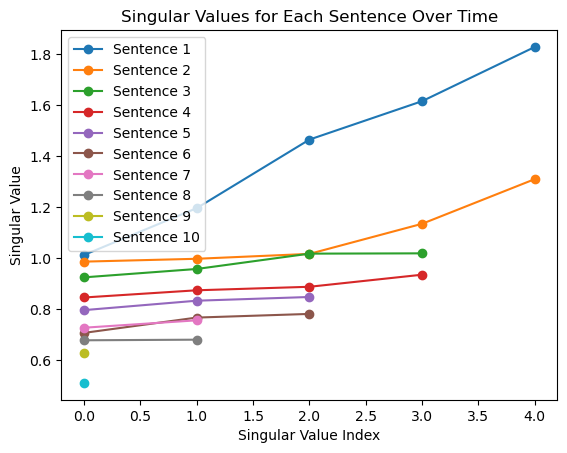

In [34]:
import matplotlib.pyplot as plt

# Singular values for each sentence over time
# singular_values = [
#     [1.415795, 1.5523775, 1.6705248, 1.7835962, 1.9310901],
#     [0.9794277, 1.080368, 1.2531227, 1.2610173, 1.4467577],
#     [0.7808348, 1.0289797, 1.0514477, 1.229018, 1.2356906],
#     [0.6531033, 0.8499178, 0.98444086, 1.0432655, 1.0727608],
#     [0.7887901, 0.8868743, 0.9808217, 1.0369053],
#     [0.7797037, 0.8365798, 0.89690256, 1.002245],
#     [0.64159346, 0.81075615, 0.83735967, 0.860856],
#     [0.7574347, 0.81352776, 0.82794535],
#     [0.6920251, 0.78892624, 0.81092685],
#     [0.60664016, 0.7608458, 0.79875755],
#     [0.70416313, 0.7775958],
#     [0.6681527, 0.7229054],
#     [0.59726167, 0.6796977],
#     [0.6495602],
#     [0.61950326],
#     [0.5506664]
# ]
singular_values = sv

# Plot singular values for each sentence
for i, sv in enumerate(singular_values):
    plt.plot(range(len(sv)), sv, marker='o', label=f'Sentence {i+1}')

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values for Each Sentence Over Time')
plt.legend()
plt.show()


# [Done by Song]****[We have a problem here: 1.why monotone increasing? 2.why first dominance?]

## ****[Ans] 
When I transform the text embeddings into svd values, will svd in scipy gives descending order automatically. We need to explain this problem. The problme is If the first sentence is set to be the most significant automatically, we don't need svd to extract the characteristics of a texts. So, we go back into the math principle of SVD. It give two orthorgonal matrices for left and right sigular vector spaces, then since they are orthogonal, suppose $A\in \mathbb{R}^{m\times n}$, whatever object in the  input in for a matrix will be assign to a basis which may not be the same the basis right singular vector space. We have right singular vector $V^T$ to rotate it for aligning the basis of $\mathbb{R}^n$ then do dimension reduction or addition into $\mathbb{R}^m$ with the corresponding singular value s, then we have left singular transformation $U$ for rotating into a basis that may not be the standard one in $\mathbb{R}^m$. Therefore, the whole process has been done by SVD. It should have extract the most significant information based on how large the singular values are, just like the using lieanr combination of rank-1 matrix can store the key image information without all pixels. As we have in extracting key informastion in texts, we should have similar process for this, but how can the first sentence always be the most important one even if I input a text with more important information on later paragraph? I give you an code example for illustration below and I will give an explanation for this problem and adjustment of code below.
```
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def update_singular_values(initial_paragraph, new_paragraphs):
    # Initialize the list of singular values for each sentence
    singular_values_over_time = []

    # Start with the initial paragraph
    current_text = initial_paragraph
    sentences = current_text.split('. ')
    sentences = [s.strip() for s in sentences if s]
    
    # Encode the initial sentences
    embeddings = model.encode(sentences)
    
    # Perform SVD on the initial embedding
    U, Sigma, Vt = svd(embeddings, full_matrices=False)
    
    # Store the initial singular values for each sentence
    for sigma in Sigma:
        singular_values_over_time.append([sigma])

    # Iterate over the new paragraphs and update the text and singular values
    for paragraph in new_paragraphs:
        # Add the new paragraph to the current text
        current_text += ' ' + paragraph
        sentences = current_text.split('. ')
        sentences = [s.strip() for s in sentences if s]

        # Encode the updated sentences
        embeddings = model.encode(sentences)

        # Perform SVD on the updated embedding matrix
        U, Sigma, Vt = svd(embeddings, full_matrices=False)

        # Update the singular values for each sentence
        for i, sigma in enumerate(Sigma):
            if i < len(singular_values_over_time):
                singular_values_over_time[i].append(sigma)
            else:
                singular_values_over_time.append([sigma])

    return singular_values_over_time

# Example usage
# initial_paragraph = "I love Columbia. The campus is beautiful. The faculty is outstanding. Students are very friendly."
# new_paragraphs = [
#     "I love humans. People are kind and compassionate. Society is complex.",
#     "I hate machines. Technology can be overwhelming. AI can be intrusive.",
#     "The weather is great today. Sunshine is perfect. The temperature is just right.",
#     "AI technology is evolving rapidly. Innovations are happening every day. It's changing our world."
# ]

initial_paragraph = "I love Columbia University. The oil company is going to be crashed."
new_paragraphs = [
    "Current market is undetermined by the wars occured at the middle east. We need more action from the government.",
    "The Government gives weapons to Iran to finnalize the war. The terrorists are been detroyed.",
    "The Government finished the war. The Oil prodcution has been returned into normal in two weeks.",
    "The oil company is stablized. The market returns to trust the oil stocks."
]


singular_values = update_singular_values(initial_paragraph, new_paragraphs)

# Print the singular values over time
for t, sv in enumerate(singular_values):
    print(f"Singular values for sentence {t}: {sv}")
```
Clearly, the text is mostly about the oil problem, the first stentence is kind of nonsense, but svd still give increasing singular value signifying high importance. 

Outcome:
```
Singular values for sentence 0: [1.0050368, 1.1889693, 1.4604394, 1.6124337, 1.8265111]
Singular values for sentence 1: [0.9949378, 1.0169067, 1.0336572, 1.1350105, 1.3087504]
Singular values for sentence 2: [0.916421, 0.9591144, 1.0347216, 1.0377983]
Singular values for sentence 3: [0.84405285, 0.86269885, 0.8785507, 0.92672944]
Singular values for sentence 4: [0.800681, 0.83514136, 0.8500907]
Singular values for sentence 5: [0.7024447, 0.7683336, 0.7792189]
Singular values for sentence 6: [0.72907335, 0.7570364]
Singular values for sentence 7: [0.67079103, 0.67365575]
Singular values for sentence 8: [0.6300706]
Singular values for sentence 9: [0.5113059]
```

## [Ans] A Dynamically Weighted SVD Soution

In [38]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def weight_embeddings(embeddings, context_vector):
    # Calculate cosine similarity with the context vector
    similarities = cosine_similarity(embeddings, context_vector.reshape(1, -1)).flatten()
    # Normalize similarities to use as weights
    weights = similarities / np.sum(similarities)
    # Weight the embeddings
    weighted_embeddings = embeddings * weights[:, np.newaxis]
    return weighted_embeddings

def update_singular_values_with_weights(initial_paragraph, new_paragraphs, context):
    # Initialize the list of singular values for each sentence
    singular_values_over_time = []

    # Encode the context vector
    context_vector = model.encode(context).reshape(1, -1)

    # Start with the initial paragraph
    current_text = initial_paragraph
    sentences = current_text.split('. ')
    sentences = [s.strip() for s in sentences if s]
    
    # Encode the initial sentences
    embeddings = model.encode(sentences)
    
    # Weight the embeddings
    weighted_embeddings = weight_embeddings(embeddings, context_vector)

    # Perform SVD on the weighted embedding
    U, Sigma, Vt = svd(weighted_embeddings, full_matrices=False)
    
    # Store the initial singular values for each sentence
    for sigma in Sigma:
        singular_values_over_time.append([sigma])

    # Iterate over the new paragraphs and update the text and singular values
    for paragraph in new_paragraphs:
        # Add the new paragraph to the current text
        current_text += ' ' + paragraph
        sentences = current_text.split('. ')
        sentences = [s.strip() for s in sentences if s]

        # Encode the updated sentences
        embeddings = model.encode(sentences)
        
        # Weight the embeddings
        weighted_embeddings = weight_embeddings(embeddings, context_vector)

        # Perform SVD on the weighted embedding matrix
        U, Sigma, Vt = svd(weighted_embeddings, full_matrices=False)

        # Update the singular values for each sentence
        for i, sigma in enumerate(Sigma):
            if i < len(singular_values_over_time):
                singular_values_over_time[i].append(sigma)
            else:
                singular_values_over_time.append([sigma])

    return singular_values_over_time

# Example usage
initial_paragraph = "I love Columbia University. The oil company is going to be crashed."
new_paragraphs = [
    "Current market is undetermined by the wars occurred at the middle east. We need more action from the government.",
    "The Government gives weapons to Iran to finalize the war. The terrorists are being destroyed.",
    "The Government finished the war. The Oil production has been returned to normal in two weeks.",
    "The oil company is stabilized. The market returns to trust the oil stocks. "
]
context = "The oil market stability and production issues."

singular_values = update_singular_values_with_weights(initial_paragraph, new_paragraphs, context)

# Print the singular values over time
for t, sv in enumerate(singular_values):
    print(f"Singular values for sentence {t}: {sv}")


Singular values for sentence 0: [1.0839479, 0.5463624, 0.43329105, 0.3416037, 0.2990804]
Singular values for sentence 1: [0.08391684, 0.3793066, 0.30031306, 0.213333, 0.14691098]
Singular values for sentence 2: [0.10461811, 0.11797295, 0.18903783, 0.12012045]
Singular values for sentence 3: [0.040625647, 0.08372724, 0.086108714, 0.11292406]
Singular values for sentence 4: [0.068981424, 0.062556155, 0.10925007]
Singular values for sentence 5: [0.031678222, 0.049070906, 0.051236592]
Singular values for sentence 6: [0.036356755, 0.037407678]
Singular values for sentence 7: [0.022134485, 0.029572042]
Singular values for sentence 8: [0.021855658]
Singular values for sentence 9: [0.013268173]


# Results : This context vector method plays like a softmax function in dynamical svd method making the most relevant sentences weigthed more by the cosine similarity within pre-trained model. 

In [39]:
sv = []
for i in range(len(singular_values)):
    sv.append(singular_values[i])
sv

[[1.0839479, 0.5463624, 0.43329105, 0.3416037, 0.2990804],
 [0.08391684, 0.3793066, 0.30031306, 0.213333, 0.14691098],
 [0.10461811, 0.11797295, 0.18903783, 0.12012045],
 [0.040625647, 0.08372724, 0.086108714, 0.11292406],
 [0.068981424, 0.062556155, 0.10925007],
 [0.031678222, 0.049070906, 0.051236592],
 [0.036356755, 0.037407678],
 [0.022134485, 0.029572042],
 [0.021855658],
 [0.013268173]]

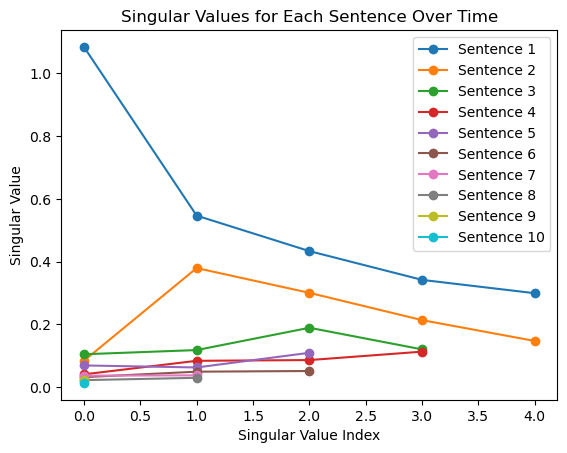

In [40]:
import matplotlib.pyplot as plt

# Singular values for each sentence over time

singular_values = sv

# Plot singular values for each sentence
for i, sv in enumerate(singular_values):
    plt.plot(range(len(sv)), sv, marker='o', label=f'Sentence {i+1}')

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values for Each Sentence Over Time')
plt.legend()
plt.show()



### Explanation:


### Understanding SVD and Sentence Embeddings

1. **Orthogonality and Basis**: SVD decomposes the embedding matrix into three matrices $U$, $\Sigma$, and $V^T$. The columns of $U$ are the left singular vectors (basis for the row space), the columns of $V$ are the right singular vectors (basis for the column space), and $\Sigma$ contains the singular values which indicate the importance of each basis vector.

2. **Sentence Embeddings**: When we use a sentence transformer model to encode sentences, each sentence is mapped to a high-dimensional vector. These embeddings capture semantic information based on the pre-trained model's understanding.

3. **Order of Singular Values**: The singular values in $\Sigma$ are always ordered in descending order. This {\bf{does not necessarily mean}} the first sentence is always the most important; rather, it indicates the direction of maximum variance in the embedding space.

### Issues with Current Approach

In the example above, the sentence about Columbia University is not contextually significant to the overall theme of oil problems, yet it receives a high singular value. This can be attributed to how embeddings and variance in the data are captured:

- **Embedding Quality**: If the initial embedding captures significant variance due to unrelated content, it can dominate the SVD process.
- **Contextual Relevance**: SVD does not inherently understand contextual relevance; it operates purely on the variance captured in the embedding space.

### Possible Adjustments

1. **Weighted Embeddings**: We could weight embeddings based on their contextual relevance before applying SVD. This requires a mechanism to determine relevance, which could be a function of embedding similarity to a predefined context vector.

2. **Incremental SVD**: Apply SVD incrementally as new paragraphs are added, re-weighting embeddings to adjust for contextual importance dynamically.

3. **Recurrent Neural Networks (RNNs)**: Use an RNN or Transformer-based model to dynamically adjust sentence embeddings based on the evolving context of the text.

### Code Adjustment for Weighted Embeddings

The code above is an example of how we might adjust the code to weight embeddings based on their relevance to the context of oil problems:


### Explanation

- **Context Vector**: A context vector is encoded from a string that summarizes the main topic (oil market stability).
- **Weight Embeddings**: Embeddings are weighted based on their cosine similarity to the context vector.
- **Update Singular Values**: The singular values are updated based on the weighted embeddings.

This approach ensures that sentences more relevant to the specified context have a greater influence on the SVD, potentially addressing the issue where initial sentences dominate the singular values regardless of their contextual significance.


# As we mentioned in previous, we have the detection method for significant texts. We can also reorder the texts before SVD, then get a new set of singular values for significant texts once we detected. This reordering doesn't change the importance of the sentence since the explanation of SDE part for a particular SDE. In addition, the reordering makes the error less because the nature of SVD we explain above. 

# [Ans] A Dynamically Weighted SVD Soution with Reordering.

# Shown below the SDE since it uses the detection method.

## 4.Embedding into SDE

This is one of the innovative parts of our research. It aims to capture the reaction based on some indicators. For example, in stock market, we have text for public to influence the stock price. We make everything else controlled so that the only thing of interets is that how the text influence the stock price. Now, the stock price is the indicator I mention, and it goes together with the corresponding text.

Now, we have the code for transforming the texts into a function of time. We want to embed this function into a stochastic process. For example, if the original stochastic process is $P(t)$, the corresponding SDE describe its infiniestimal time change is $dP_t=b(P_t,t)dt+s(P_t,t)dW_t$. Firstly, embeding the text function $f(T): \mathbb{T}\to \mathbb{R}^{384}$, where $\mathbb{T}$ is text input space, into $P(t)$ so that makes it be $P(t,f(T))$ is not hard if the corresponding relationship is not given, since we can just match them one-by-one randomly. However, there is a correct answer of $P^*(t,f(T))$ for different input $f(T)$. We can use these pairs to be traning set to create a loss function for a designed neural network to fit the correct relation of SDE. While for discrete data of text, we have discrete many sets of neural network. 


This clearly is not enough for our goal of influence problem, that is give a random input text, we can have higher accuarcy on prediction realization based on the output SDE. My idea is that once we have these sets of neural network, we can determine a threshold (not sure what it is? like upper quartile? ) and sift them out for signiifcant texts, we can make weights of these neural network higher than others using softmax or some other. Then, we get the significance order, and we can truncate based on needs of accuracy and complexity. 

#### Remark
The explanation above will easily confuses people with the second part PINN work. I will explain the difference here. The influence problem is given a input text $T$, then output a stochastic process $P(t,T_t)$. Simply, $\mathscr{N}(f(T))=P(t,T_t)$, where $\mathscr{N}$ is the neural network operator we designed. In contrast to PINN, the PINN gives texts $T$ and realization of stck price $p(t)$, we need to get the original SDE based on method like backward equation to for the stochastic process $P(t,T_t)$. Now, we have $P(t,T_t)$ and $T_t$, we need to find a way to get the operation $P(t,\cdot)$ in PINN's work. So, the main difference is that PINN seeks for $P(t,\cdot)$, whereas influence seeks for $P(t,T_t)$.

## I: Geometric Brownian Motion (GBM)

Geometric Brownian Motion (GBM) is a widely used stochastic process in financial modeling to simulate the price dynamics of stocks and other financial instruments. GBM assumes that the log returns of the stock prices are normally distributed, which makes the model suitable for modeling stock prices under the assumption of constant volatility and drift.

### Mathematical Formulation

The stochastic differential equation (SDE) for GBM is given by:

$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $

where:
- $ S_t $ is the stock price at time $ t $.
- $ \mu $ is the drift coefficient (expected return).
- $ \sigma $ is the volatility coefficient.
- $ W_t $ is a standard Brownian motion or Wiener process.

### Python Code for Simulating Geometric Brownian Motion

Here is the Python code to simulate a GBM path using the Euler-Maruyama method:

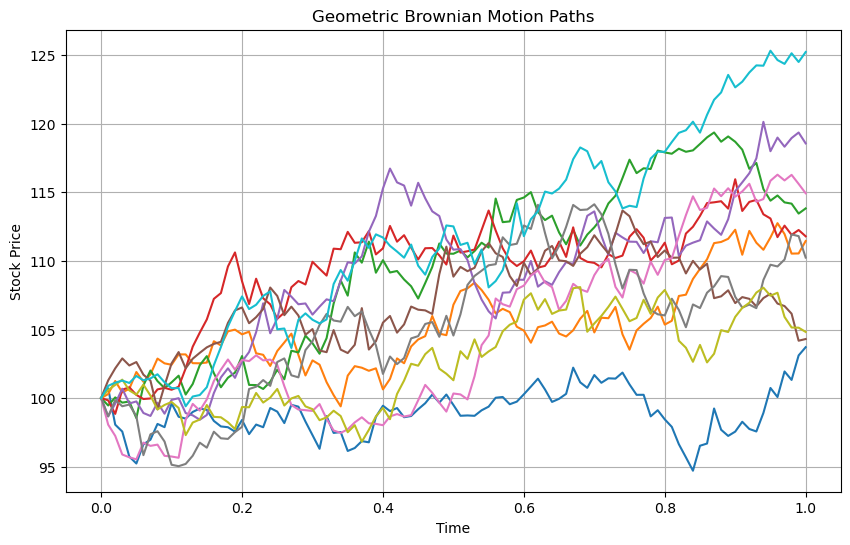

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt, n_paths):
    """
    Simulate geometric Brownian motion (GBM) paths.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - T: Time horizon.
    - dt: Time step size.
    - n_paths: Number of simulation paths.
    
    Returns:
    - t: Array of time points.
    - S: Array of simulated paths.
    """
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps + 1)
    S = np.zeros((n_steps + 1, n_paths))
    S[0] = S0
    
    for i in range(1, n_steps + 1):
        Z = np.random.normal(0, np.sqrt(dt), n_paths)  # dW_t ~ N(0, (dt))
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
    return t, S

# Parameters
S0 = 100       # Initial stock price
mu = 0.1       # Drift coefficient
sigma = 0.1    # Volatility coefficient
T = 1.0        # Time horizon (1 year)
dt = 0.01      # Time step size
n_paths = 10   # Number of simulation paths

# Simulate GBM
t, S = simulate_gbm(S0, mu, sigma, T, dt, n_paths)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, S[:, i], lw=1.5)
plt.title('Geometric Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


### Explanation

1. **Random Normal Increments**:
   - The increments $\delta W_t$ are generated using `np.random.normal(0, np.sqrt(dt), n_paths)`. This ensures that each increment follows a normal distribution with mean 0 and standard deviation $\sqrt{dt}$.

2. **Euler-Maruyama Update**:
   - The stock price $ S_t $ is updated at each time step using the formula:
     
     $S_{t+\delta t} = S_t \exp\left((\mu - 0.5\sigma^2) \delta t + \sigma \delta W_t\right)$
     
   - This accounts for both the deterministic trend (drift) and the stochastic component (volatility) of the GBM.

This code provides a simple and effective way to simulate and visualize the paths of a stock price modeled by Geometric Brownian Motion.


### Remark:
### Why Stocks Follow Geometric Brownian Motion (GBM)

Geometric Brownian Motion (GBM) is a mathematical model often used to describe the evolution of stock prices. The rationale behind using GBM for modeling stock prices is based on several key assumptions and properties that align well with the observed behavior of financial markets.

### Key Reasons and Assumptions:

1. **Log-Normal Distribution of Returns**:
   - GBM assumes that the log returns of a stock are normally distributed. Empirical studies have shown that over short time intervals, the log returns of stock prices approximately follow a normal distribution.
   - The log-normal distribution ensures that stock prices remain positive, which is a realistic constraint since a stock price cannot be negative.

2. **Constant Drift and Volatility**:
   - The GBM model incorporates a constant drift term (\(\mu\)) representing the average rate of return, and a constant volatility term (\(\sigma\)) representing the standard deviation of returns.
   - These constants provide a simple yet powerful way to model the average growth rate of stock prices and the variability around this growth.

3. **Markov Property**:
   - GBM assumes that the future price of a stock depends only on its current price, not on its past history. This is known as the Markov property.
   - This assumption simplifies the modeling process and is consistent with the concept of market efficiency, where all available information is already reflected in the current price.

4. **Continuous Path and Brownian Motion**:
   - GBM uses Brownian motion ($(W_t$) to model the random component of stock price changes. Brownian motion is a continuous-time stochastic process with stationary and independent increments, which captures the inherent randomness in stock price movements.
   - This continuous path assumption aligns well with the observation that stock prices, in reality, change continuously over time, albeit with small discrete jumps in practice.

### Mathematical Formulation

The SDE for GBM is:
$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $

- $ S_t $: Stock price at time $ t $
- $ \mu $ Drift coefficient (expected return)
- $ \sigma $ Volatility coefficient (standard deviation of returns)
- $ W_t $ Standard Brownian motion

### Empirical and Theoretical Justifications

1. **Efficient Market Hypothesis (EMH)**:
   - According to EMH, stock prices fully reflect all available information and follow a random walk. GBM, by incorporating random Brownian motion, is a natural representation of the random walk hypothesis in continuous time.
   - Eugene Fama’s work on EMH supports the idea that stock price changes are unpredictable and follow a random process  .

2. **Black-Scholes Model**:
   - The Black-Scholes option pricing model, which is foundational in financial theory, assumes that stock prices follow GBM. This model has been widely validated and used in financial markets for pricing options and other derivatives .

3. **Real-World Observations**:
   - Empirical studies of stock returns often show that over short intervals, the distribution of returns is approximately normal, supporting the use of GBM for modeling stock prices .

### Conclusion

While GBM is a simplification and does not capture all aspects of stock price behavior (such as jumps, fat tails, and volatility clustering), it provides a robust and tractable framework for modeling stock prices under the assumption of log-normal returns, constant drift, and volatility, and the Markov property. These properties align well with many observed characteristics of financial markets, making GBM a widely used model in finance.

## We have the code for a common GBM SDE with given parameters. Now, it is safe to assume that the stock price originally follows GBM. 

### References

1. Fama, Eugene F. "Efficient Capital Markets: A Review of Theory and Empirical Work." *The Journal of Finance* 25.2 (1970): 383-417.
2. Malkiel, Burton G. *A Random Walk Down Wall Street: The Time-Tested Strategy for Successful Investing*. W.W. Norton & Company, 2015.
3. Black, Fischer, and Myron Scholes. "The Pricing of Options and Corporate Liabilities." *Journal of Political Economy* 81.3 (1973): 637-654.
4. Campbell, John Y., Andrew W. Lo, and A. Craig MacKinlay. *The Econometrics of Financial Markets*. Princeton University Press, 1997.

## [Solved by Liu] ****[European Option & American Option Explanation]

## II: Incorporating into SDE by Detection Method

I am going to embed the $f(T)$ into the GBM now. For now, I give a code of detection method of arbitrary level of abnormality of a stock price below. 

For example, if I set 10, it means if we have a GBM realization, we have a probability distribution at given time point, then the upper 5% and lower 5% are the detection zone. Once the realization price goes into the detection zone, we return the time point. Just give me a simple code in python

### Fix a time, log-normal distribution of GBM shown

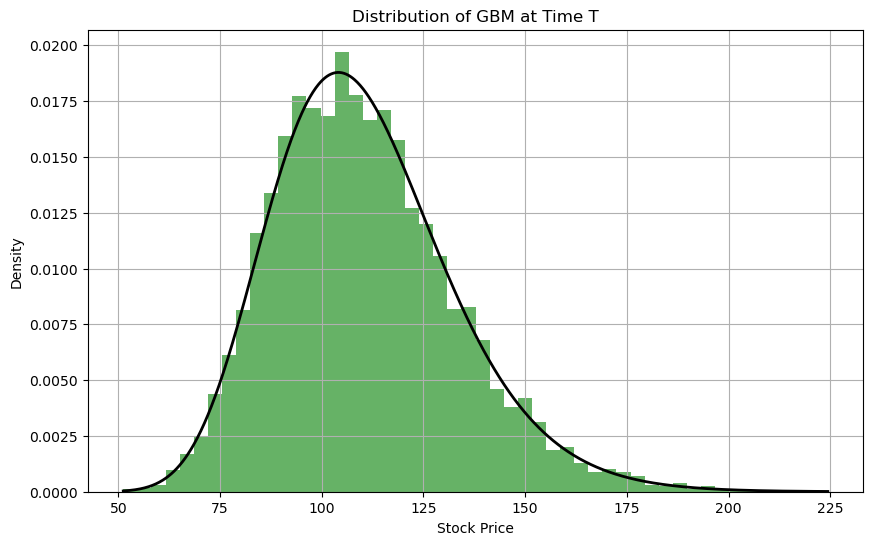

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
S0 = 100       # Initial stock price
mu = 0.1       # Drift coefficient
sigma = 0.2    # Volatility coefficient
T = 1.0        # Time horizon (1 year)
dt = 0.01      # Time step size
n_simulations = 10000  # Number of simulation paths

# Simulate GBM
n_steps = int(T / dt)
S_T = np.zeros(n_simulations)
for i in range(n_simulations):
    S = S0
    for j in range(n_steps):
        Z = np.random.normal(0, np.sqrt(dt))
        S = S * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    S_T[i] = S

# Plot the histogram of the simulated final stock prices
plt.figure(figsize=(10, 6))
plt.hist(S_T, bins=50, density=True, alpha=0.6, color='g')

# Plot the theoretical log-normal distribution
mu_T = np.log(S0) + (mu - 0.5 * sigma**2) * T
sigma_T = sigma * np.sqrt(T)
x = np.linspace(min(S_T), max(S_T), 1000)
pdf = stats.lognorm.pdf(x, sigma_T, scale=np.exp(mu_T))
plt.plot(x, pdf, 'k', linewidth=2)

plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.title('Distribution of GBM at Time T')
plt.grid(True)
plt.show()


Given a fixed time $ t $, the distribution of a Geometric Brownian Motion (GBM) can be described mathematically and empirically.

### Mathematical Distribution

A Geometric Brownian Motion (GBM) $ S_t $ at a fixed time $ t $ is log-normally distributed. This follows from the definition and properties of GBM. If $ S_t $ follows GBM, then:

$ S_t = S_0 \exp\left( \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t \right) $

where:
- $ S_t $ is the stock price at time $ t $
- $ S_0 $ is the initial stock price
- $ \mu $ is the drift coefficient
- $ \sigma $ is the volatility coefficient
- $ W_t $ is a standard Brownian motion at time $ t $

From this, it follows that the logarithm of $ S_t $:


$ \log(S_t) = \log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t $

Given that $ W_t \sim \mathcal{N}(0, t) $ (a normal distribution with mean 0 and variance $ t $), it implies:

$ \log(S_t) \sim \mathcal{N}\left(\log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right)t, \sigma^2 t \right) $

This means $ S_t $ is log-normally distributed with parameters:

- Mean: $ \log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right)t $
- Variance: $ \sigma^2 t $

### Distribution of $ S_t $

Since $ \log(S_t) $ is normally distributed, $ S_t $ itself is log-normally distributed. The probability density function (pdf) of a log-normal distribution is given by:

$ f_{S_t}(s) = \frac{1}{s\sigma\sqrt{2\pi t}} \exp\left( -\frac{(\log(s) - \left[\log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right)t\right])^2}{2\sigma^2 t} \right) $


In [84]:
S[1]

array([100.23033943, 101.06929856, 100.00068314,  99.15099651,
        99.86080461,  99.00855743, 101.09816226, 101.18848784,
        98.80319305,  98.79801601])

### Max-Min Criteria

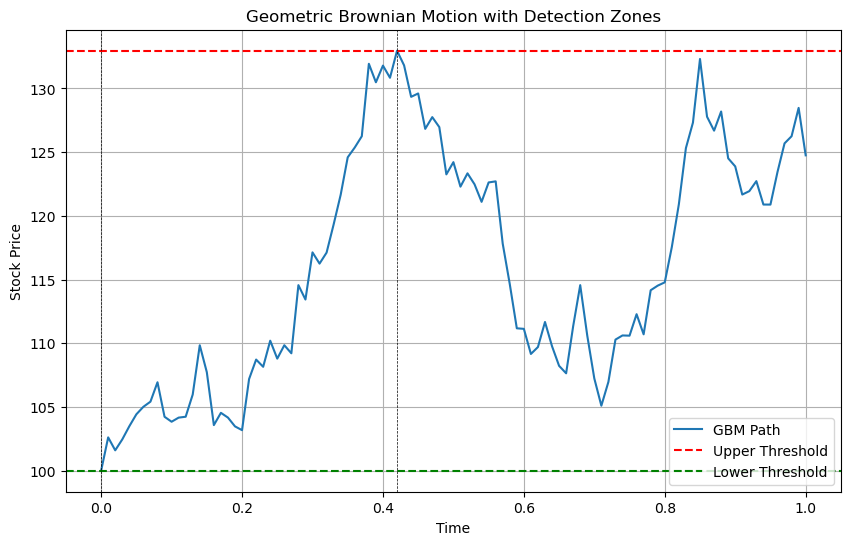

Detection times: [0, 42]


In [13]:
# import numpy as np
# import matplotlib.pyplot as plt

# def simulate_gbm(S0, mu, sigma, T, dt):
#     """
#     Simulate a single geometric Brownian motion (GBM) path.
    
#     Parameters:
#     - S0: Initial stock price.
#     - mu: Drift coefficient.
#     - sigma: Volatility coefficient.
#     - T: Time horizon.
#     - dt: Time step size.
    
#     Returns:
#     - t: Array of time points.
#     - S: Array of simulated stock prices.
#     """
#     n_steps = int(T / dt)
#     t = np.linspace(0, T, n_steps + 1)
#     S = np.zeros(n_steps + 1)
#     S[0] = S0
    
#     for i in range(1, n_steps + 1):
#         Z = np.random.normal(0, np.sqrt(dt))
#         S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
#     return t, S

# def detect_abnormality(S, threshold_percent):
#     """
#     Detect the time points where the stock price goes into the detection zone.
    
#     Parameters:
#     - S: Array of simulated stock prices.
#     - threshold_percent: The upper and lower percentile threshold for detection.
    
#     Returns:
#     - detection_times: List of time points where the price goes into the detection zone.
#     """
#     detection_times = []
#     n = len(S)
    
#     # Calculate the detection thresholds
#     upper_threshold = np.percentile(S, 100 - threshold_percent / 2)
#     lower_threshold = np.percentile(S, threshold_percent / 2)
    
#     # Detect abnormal levels
#     for i in range(n):
#         if S[i] >= upper_threshold or S[i] <= lower_threshold:
#             detection_times.append(i)
    
#     return detection_times

# # Parameters
# S0 = 100       # Initial stock price
# mu = 0.1       # Drift coefficient
# sigma = 0.2    # Volatility coefficient
# T = 1.0        # Time horizon (1 year)
# dt = 0.01      # Time step size
# threshold_percent = 0  # Upper 5% and lower 5% detection zones

# # Simulate GBM
# t, S = simulate_gbm(S0, mu, sigma, T, dt)

# # Detect abnormality
# detection_times = detect_abnormality(S, threshold_percent)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(t, S, lw=1.5, label='GBM Path')
# plt.axhline(np.percentile(S, 100 - threshold_percent / 2), color='r', linestyle='--', label='Upper Threshold')
# plt.axhline(np.percentile(S, threshold_percent / 2), color='g', linestyle='--', label='Lower Threshold')
# for dt in detection_times:
#     plt.axvline(t[dt], color='k', linestyle='--', lw=0.5)
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.title('Geometric Brownian Motion with Detection Zones')
# plt.grid(True)
# plt.show()

# # Print detection times
# print("Detection times:", detection_times)


### Density Criteria [Fail]

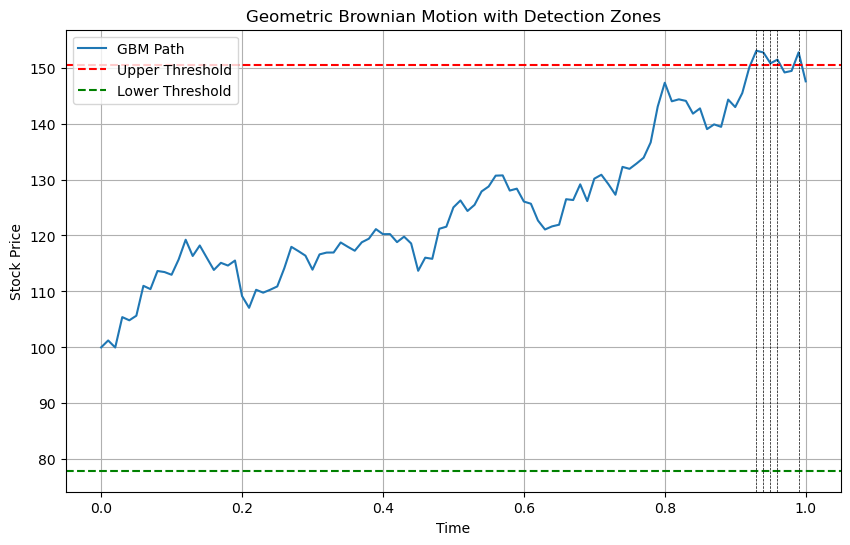

Detection times: [93, 94, 95, 96, 99]


In [125]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# def simulate_gbm(S0, mu, sigma, T, dt):
#     """
#     Simulate a single geometric Brownian motion (GBM) path.
    
#     Parameters:
#     - S0: Initial stock price.
#     - mu: Drift coefficient.
#     - sigma: Volatility coefficient.
#     - T: Time horizon.
#     - dt: Time step size.
    
#     Returns:
#     - t: Array of time points.
#     - S: Array of simulated stock prices.
#     """
#     n_steps = int(T / dt)
#     t = np.linspace(0, T, n_steps + 1)
#     S = np.zeros(n_steps + 1)
#     S[0] = S0
    
#     for i in range(1, n_steps + 1):
#         Z = np.random.normal(0, np.sqrt(dt))
#         S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
#     return t, S

# def calculate_log_normal_thresholds(S0, mu, sigma, T, threshold_percent):
#     """
#     Calculate the upper and lower thresholds based on the theoretical log-normal distribution.
    
#     Parameters:
#     - S0: Initial stock price.
#     - mu: Drift coefficient.
#     - sigma: Volatility coefficient.
#     - T: Time horizon.
#     - threshold_percent: The upper and lower percentile threshold for detection.
    
#     Returns:
#     - upper_threshold: The upper threshold value.
#     - lower_threshold: The lower threshold value.
#     """
#     mu_T = np.log(S0) + (mu - 0.5 * sigma**2) * T
#     sigma_T = sigma * np.sqrt(T)
    
#     upper_threshold = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_T, scale=np.exp(mu_T))
#     lower_threshold = stats.lognorm.ppf(threshold_percent / 200, sigma_T, scale=np.exp(mu_T))
    
#     return upper_threshold, lower_threshold

# def detect_abnormality(S, upper_threshold, lower_threshold):
#     """
#     Detect the time points where the stock price goes into the detection zone.
    
#     Parameters:
#     - S: Array of simulated stock prices.
#     - upper_threshold: The upper threshold value.
#     - lower_threshold: The lower threshold value.
    
#     Returns:
#     - detection_times: List of time points where the price goes into the detection zone.
#     """
#     detection_times = []
#     n = len(S)
    
#     # Detect abnormal levels
#     for i in range(n):
#         if S[i] >= upper_threshold or S[i] <= lower_threshold:
#             detection_times.append(i)
    
#     return detection_times

# # Parameters
# S0 = 100       # Initial stock price
# mu = 0.1       # Drift coefficient
# sigma = 0.2    # Volatility coefficient
# T = 1.0        # Time horizon (1 year)
# dt = 0.01      # Time step size
# threshold_percent = 10  # Upper 5% and lower 5% detection zones

# # Simulate GBM
# t, S = simulate_gbm(S0, mu, sigma, T, dt)

# # Calculate theoretical thresholds
# upper_threshold, lower_threshold = calculate_log_normal_thresholds(S0, mu, sigma, T, threshold_percent)

# # Detect abnormality
# detection_times = detect_abnormality(S, upper_threshold, lower_threshold)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(t, S, lw=1.5, label='GBM Path')
# plt.axhline(upper_threshold, color='r', linestyle='--', label='Upper Threshold')
# plt.axhline(lower_threshold, color='g', linestyle='--', label='Lower Threshold')
# for dt in detection_times:
#     plt.axvline(t[dt], color='k', linestyle='--', lw=0.5)
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.title('Geometric Brownian Motion with Detection Zones')
# plt.grid(True)
# plt.show()

# # Print detection times
# print("Detection times:", detection_times)


### Density Criteria [Success]

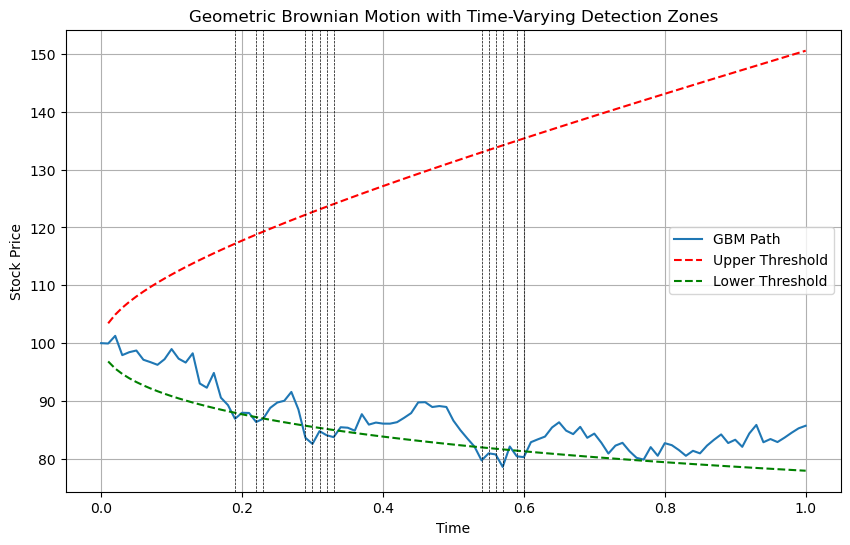

Detection times: [19, 22, 23, 29, 30, 31, 32, 33, 54, 55, 56, 57, 59, 60]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def simulate_gbm(S0, mu, sigma, T, dt):
    """
    Simulate a single geometric Brownian motion (GBM) path.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - T: Time horizon.
    - dt: Time step size.
    
    Returns:
    - t: Array of time points.
    - S: Array of simulated stock prices.
    """
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps + 1)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    
    for i in range(1, n_steps + 1):
        Z = np.random.normal(0, np.sqrt(dt))
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
    return t, S

def calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent):
    """
    Calculate the upper and lower thresholds based on the theoretical log-normal distribution at each time step.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - t: Array of time points.
    - threshold_percent: The upper and lower percentile threshold for detection.
    
    Returns:
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    """
    upper_thresholds = np.zeros(len(t))
    lower_thresholds = np.zeros(len(t))
    
    for i in range(len(t)):
        mu_t = np.log(S0) + (mu - 0.5 * sigma**2) * t[i]
        sigma_t = sigma * np.sqrt(t[i])
        
        upper_thresholds[i] = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
        lower_thresholds[i] = stats.lognorm.ppf(threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
    
    return upper_thresholds, lower_thresholds

def detect_abnormality(S, upper_thresholds, lower_thresholds):
    """
    Detect the time points where the stock price goes into the detection zone.
    
    Parameters:
    - S: Array of simulated stock prices.
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    
    Returns:
    - detection_times: List of time points where the price goes into the detection zone.
    """
    detection_times = []
    n = len(S)
    
    # Detect abnormal levels
    for i in range(n):
        if S[i] >= upper_thresholds[i] or S[i] <= lower_thresholds[i]:
            detection_times.append(i)
    
    return detection_times

# Parameters
S0 = 100       # Initial stock price
mu = 0.1       # Drift coefficient
sigma = 0.2    # Volatility coefficient
T = 1.0        # Time horizon (1 year)
dt = 0.01      # Time step size
threshold_percent = 10  # Upper 5% and lower 5% detection zones

# Simulate GBM
t, S = simulate_gbm(S0, mu, sigma, T, dt)

# Calculate theoretical thresholds at each time step
upper_thresholds, lower_thresholds = calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent)

# Detect abnormality
detection_times = detect_abnormality(S, upper_thresholds, lower_thresholds)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, lw=1.5, label='GBM Path')
plt.plot(t, upper_thresholds, 'r--', label='Upper Threshold')
plt.plot(t, lower_thresholds, 'g--', label='Lower Threshold')
for dt in detection_times:
    plt.axvline(t[dt], color='k', linestyle='--', lw=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion with Time-Varying Detection Zones')
plt.grid(True)
plt.show()

# Print detection times
print("Detection times:", detection_times)


Now, we can see the probability of getting into the detection zone has been set to 10% (or arbitrary). If we get the empirical realization much greater than this, then it means the text plays an important role to change the probabiity density function by law of large number, since we have the assumption that hold other varibles controlled. 

# [Solved By Liu]****[The Detection bounds are based on previous staring point price]

# UNN [Fail]

# Experiment for  Threshold [Fail]

We aim to incorporate these text-based features into the SDE while ensuring that the model learns effectively from the available data.

### Proposed Solution

### 1. Unified Neural Network Model

Instead of creating multiple neural networks for different text inputs, consider a unified neural network model that takes both the current state $ P_t $ and the text embedding $ f(T) $ as inputs. This model will learn to predict the drift $ b(P_t, f(T), t) $ and volatility $ s(P_t, f(T), t) $ functions directly.

#### Neural Network Architecture

- **Inputs**: $ P_t $, $ f(T) $, and $ t $
- **Outputs**: $ b(P_t, f(T), t) $ and $ s(P_t, f(T), t) $



In [7]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class SDEModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(SDEModel, self).__init__()
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc3 = nn.Linear(hidden_dim, output_dim)
#         self.relu = nn.ReLU()

#     def forward(self, P_t, f_T, t):
#         x = torch.cat((P_t, f_T, t), dim=1)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         b_s = self.fc3(x)
#         return b_s[:, 0], b_s[:, 1]

# # Example usage
# input_dim = 384 + 1 + 1  # f(T) + P_t + t
# hidden_dim = 128
# output_dim = 2  # b(P_t, f(T), t) and s(P_t, f(T), t)

# model = SDEModel(input_dim, hidden_dim, output_dim)


### 2. Training the Model

You can train the unified model on a dataset that includes the state $ P_t $, text embedding $ f(T) $, and the time $ t $, along with the corresponding drift and volatility values. The loss function can be designed to minimize the difference between the predicted and actual values of $ b $ and $ s $.

In [10]:
# def train_sde_model(model, train_loader, num_epochs=100, learning_rate=0.001):
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     for epoch in range(num_epochs):
#         for P_t, f_T, t, b_true, s_true in train_loader:
#             optimizer.zero_grad()
#             b_pred, s_pred = model(P_t, f_T, t)
#             loss = criterion(b_pred, b_true) + criterion(s_pred, s_true)
#             loss.backward()
#             optimizer.step()
#         print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# # Example training loop
# # Assuming train_loader is a DataLoader object with your training data
# # train_sde_model(model, train_loader)


### 3. Handling Multiple Text Inputs

Instead of training separate networks, the unified model can handle different text inputs by leveraging the text embeddings $ f(T) $. The model's training process will help it learn the influence of different text features on the SDE parameters.

### 4. Evaluating Importance of Text Inputs

To determine the significance of different text inputs, you can use techniques such as:

- **Attention Mechanisms**: Implement an attention mechanism within the neural network to weigh the importance of different parts of the text embeddings.
- **Feature Importance Analysis**: Use methods like SHAP (SHapley Additive exPlanations) to analyze the contribution of each feature (including text features) to the model's predictions.

### 5. Truncating Based on Accuracy and Complexity

After training the model, you can evaluate its performance and decide on the truncation threshold based on your requirements for accuracy and complexity. The use of attention weights or feature importance scores can help in determining which text features are most significant and should be retained.

### Conclusion

By using a unified neural network model that takes both the state $ P_t $ and the text embedding $ f(T) $ as inputs, you can efficiently integrate textual information into the SDE framework. This approach avoids the complexity of managing multiple neural networks and leverages the power of deep learning to capture the intricate relationships between text features and the SDE parameters.


# Trail???

In [34]:
# def detect_abnormal_change(stock_prices, threshold=0.05):
#     """
#     Detects if there is an abnormal change in stock prices.
    
#     Parameters:
#     - stock_prices: List of stock prices over time.
#     - threshold: The threshold for detecting abnormal changes.
    
#     Returns:
#     - List of indices where abnormal changes occur.
#     """
#     changes = np.diff(stock_prices) / stock_prices[:-1]
#     abnormal_indices = np.where(np.abs(changes) > threshold)[0] + 1  # +1 to shift to the right index
#     return abnormal_indices

# # Example usage
# stock_prices = [100, 105, 110, 108, 120, 115, 130, 135]
# abnormal_indices = detect_abnormal_change(stock_prices)
# print("Abnormal changes detected at indices:", abnormal_indices)


Abnormal changes detected at indices: [4 6]


In [37]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class SDEModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(SDEModel, self).__init__()
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc3 = nn.Linear(hidden_dim, output_dim)
#         self.relu = nn.ReLU()

#     def forward(self, P_t, f_T, t):
#         x = torch.cat((P_t, f_T, t), dim=1)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         b_s = self.fc3(x)
#         return b_s[:, 0], b_s[:, 1]

# # Example usage
# input_dim = 384 + 1 + 1  # f(T) + P_t + t
# hidden_dim = 128
# output_dim = 2  # b(P_t, f(T), t) and s(P_t, f(T), t)

# model = SDEModel(input_dim, hidden_dim, output_dim)

# # Dummy data for illustration
# P_t = torch.randn(10, 1)
# f_T = torch.randn(10, 384)
# t = torch.randn(10, 1)

# b, s = model(P_t, f_T, t)
# print("Predicted drift (b):", b)
# print("Predicted volatility (s):", s)


Predicted drift (b): tensor([-0.0429, -0.1255,  0.0170,  0.0368, -0.1149, -0.0016, -0.1590, -0.1243,
        -0.0447, -0.0953], grad_fn=<SelectBackward0>)
Predicted volatility (s): tensor([-0.1001, -0.1082, -0.1565, -0.0535, -0.1941, -0.1485, -0.0468, -0.0881,
        -0.1381, -0.1237], grad_fn=<SelectBackward0>)


# UNN [Fail] Reason:
The method seeks to find a neural network to fit in the $f(T)$ into SDE. However, for one particular true solution, we have only one loss function. For a sets of true solution for learning, we have many of loss functions. My idea to put these loss functions into a set in any sense is not tangible since as input grows we have many more set of neural networks to consider, the hidden layers will increase multiply or even exponentialy. This makes it so complex that computer may not able to do this work in practice. 

Compare to the detection method, we foregive some deterministicity (originally is also a numerical not algebraic solution) to get much better in reducing the complexity in practice. 

### Detection Method for Texts

We have the code for detection of abnormality as we mention above. We want to make a fake dataset of stock price and texts related to the company that may or may not influence the company stock price based on time intervals. Then, as we get whole stock prices, we use the detection method code to detect at what time the stock price becomes abnormal, then get the most recent texts. 

#### Random Texts

In [157]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import random

# def simulate_gbm(S0, mu, sigma, T, dt):
#     """
#     Simulate a single geometric Brownian motion (GBM) path.
    
#     Parameters:
#     - S0: Initial stock price.
#     - mu: Drift coefficient.
#     - sigma: Volatility coefficient.
#     - T: Time horizon.
#     - dt: Time step size.
    
#     Returns:
#     - t: Array of time points.
#     - S: Array of simulated stock prices.
#     """
#     n_steps = int(T / dt)
#     t = np.linspace(0, T, n_steps + 1)
#     S = np.zeros(n_steps + 1)
#     S[0] = S0
    
#     for i in range(1, n_steps + 1):
#         Z = np.random.normal(0, np.sqrt(dt))
#         S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
#     return t, S

# def calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent):
#     """
#     Calculate the upper and lower thresholds based on the theoretical log-normal distribution at each time step.
    
#     Parameters:
#     - S0: Initial stock price.
#     - mu: Drift coefficient.
#     - sigma: Volatility coefficient.
#     - t: Array of time points.
#     - threshold_percent: The upper and lower percentile threshold for detection.
    
#     Returns:
#     - upper_thresholds: Array of upper threshold values for each time step.
#     - lower_thresholds: Array of lower threshold values for each time step.
#     """
#     upper_thresholds = np.zeros(len(t))
#     lower_thresholds = np.zeros(len(t))
    
#     for i in range(len(t)):
#         mu_t = np.log(S0) + (mu - 0.5 * sigma**2) * t[i]
#         sigma_t = sigma * np.sqrt(t[i])
        
#         upper_thresholds[i] = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
#         lower_thresholds[i] = stats.lognorm.ppf(threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
    
#     return upper_thresholds, lower_thresholds

# def detect_abnormality(S, upper_thresholds, lower_thresholds):
#     """
#     Detect the time points where the stock price goes into the detection zone.
    
#     Parameters:
#     - S: Array of simulated stock prices.
#     - upper_thresholds: Array of upper threshold values for each time step.
#     - lower_thresholds: Array of lower threshold values for each time step.
    
#     Returns:
#     - detection_times: List of time points where the price goes into the detection zone.
#     """
#     detection_times = []
#     n = len(S)
    
#     # Detect abnormal levels
#     for i in range(n):
#         if S[i] >= upper_thresholds[i] or S[i] <= lower_thresholds[i]:
#             detection_times.append(i)
    
#     return detection_times

# def generate_fake_texts(n_texts, start_time, end_time):
#     """
#     Generate fake text data associated with time intervals.
    
#     Parameters:
#     - n_texts: Number of texts to generate.
#     - start_time: Start of the time interval.
#     - end_time: End of the time interval.
    
#     Returns:
#     - texts: List of tuples (time, text).
#     """
#     texts = []
#     times = np.linspace(start_time, end_time, n_texts)
#     for t in times:
#         text = f"News at time {t:.2f}: " + " ".join(random.choices(['company', 'profit', 'loss', 'market', 'stock', 'investment', 'price', 'share', 'financial', 'growth'], k=5))
#         texts.append((t, text))
#     return texts

# # Parameters
# S0 = 100       # Initial stock price
# mu = 0.1       # Drift coefficient
# sigma = 0.2    # Volatility coefficient
# T = 1.0        # Time horizon (1 year)
# dt = 0.01      # Time step size
# threshold_percent = 10  # Upper 5% and lower 5% detection zones
# n_texts = 100  # Number of texts to generate

# # Simulate GBM
# t, S = simulate_gbm(S0, mu, sigma, T, dt)

# # Generate fake texts
# texts = generate_fake_texts(n_texts, 0, T)

# # Calculate theoretical thresholds at each time step
# upper_thresholds, lower_thresholds = calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent)

# # Detect abnormality
# detection_times = detect_abnormality(S, upper_thresholds, lower_thresholds)

# # Retrieve most recent texts at detected abnormal times
# for dt in detection_times:
#     recent_texts = [text for time, text in texts if time <= t[dt]]
#     recent_texts = recent_texts[-5:]  # Get the last 5 texts
#     print(f"Abnormality detected at time {t[dt]:.2f}")
#     for rt in recent_texts:
#         print(rt)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(t, S, lw=1.5, label='GBM Path')
# plt.plot(t, upper_thresholds, 'r--', label='Upper Threshold')
# plt.plot(t, lower_thresholds, 'g--', label='Lower Threshold')
# for dt in detection_times:
#     plt.axvline(t[dt], color='k', linestyle='--', lw=0.5)
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.title('Geometric Brownian Motion with Time-Varying Detection Zones')
# plt.grid(True)
# plt.show()

# # Print detection times
# print("Detection times:", detection_times)


#### Meaningful Texts

Abnormality detected at time 3
Stock price: 108
Boundary: lower
Difference from boundary: -8.443732683097608
Recent texts:
 - Quarterly earnings report released.
 - CEO interview about future plans.
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 4
Stock price: 120
Boundary: lower
Difference from boundary: -4.440954794990503
Recent texts:
 - Quarterly earnings report released.
 - CEO interview about future plans.
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 5
Stock price: 115
Boundary: lower
Difference from boundary: -18.202418797956682
Recent texts:
 - Quarterly earnings report released.
 - CEO interview about future plans.
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 6
Stock price: 130
Boundary: lower
Difference from boundary: -12

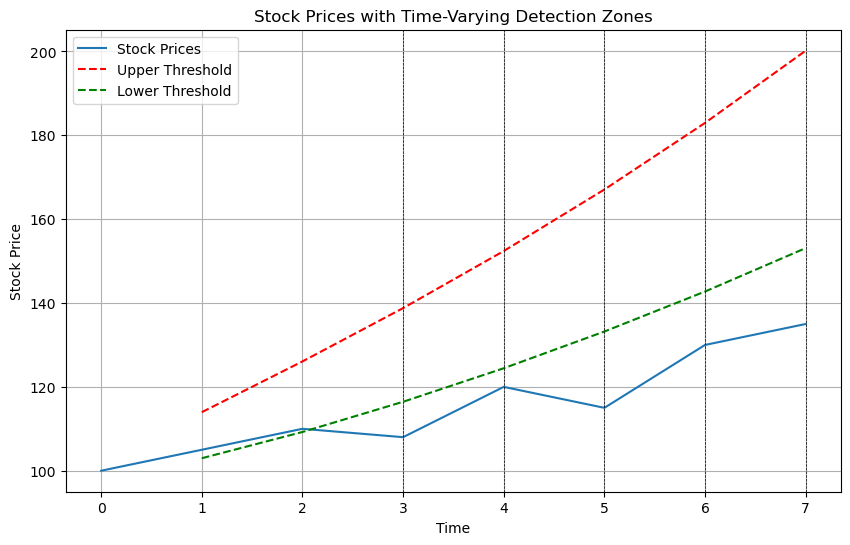

Detection times: [3, 4, 5, 6, 7]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent):
    """
    Calculate the upper and lower thresholds based on the theoretical log-normal distribution at each time step.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - t: Array of time points.
    - threshold_percent: The upper and lower percentile threshold for detection.
    
    Returns:
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    """
    upper_thresholds = np.zeros(len(t))
    lower_thresholds = np.zeros(len(t))
    
    for i in range(len(t)):
        mu_t = np.log(S0) + (mu - 0.5 * sigma**2) * t[i]
        sigma_t = sigma * np.sqrt(t[i])
        
        upper_thresholds[i] = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
        lower_thresholds[i] = stats.lognorm.ppf(threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
    
    return upper_thresholds, lower_thresholds

def detect_abnormality(S, upper_thresholds, lower_thresholds):
    """
    Detect the time points where the stock price goes into the detection zone.
    
    Parameters:
    - S: Array of simulated stock prices.
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    
    Returns:
    - detection_info: List of dictionaries with detection time, recent texts, and price difference details.
    """
    detection_info = []
    n = len(S)
    
    # Detect abnormal levels
    for i in range(n):
        if S[i] >= upper_thresholds[i] or S[i] <= lower_thresholds[i]:
            if S[i] >= upper_thresholds[i]:
                difference = S[i] - upper_thresholds[i]
                boundary = 'upper'
            else:
                difference = S[i] - lower_thresholds[i]
                boundary = 'lower'
            detection_info.append({
                'time': i,
                'price': S[i],
                'boundary': boundary,
                'difference': difference,
            })
    
    return detection_info

# User inputs
stock_prices = np.array([100, 105, 110, 108, 120, 115, 130, 135])  # Example stock prices
text_data = [
    (0.0, "Company announces new product."),
    (0.2, "Quarterly earnings report released."),
    (0.4, "CEO interview about future plans."),
    (0.6, "New partnership with another company."),
    (0.8, "Market analysis report."),
    (1.0, "Product recall due to defects."),
]  # Example texts with timestamps

# Parameters
S0 = stock_prices[0]       # Initial stock price
mu = 0.1                   # Drift coefficient (example value, can be adjusted)
sigma = 0.2                # Volatility coefficient (example value, can be adjusted)
T = len(stock_prices) - 1  # Time horizon based on the length of stock prices
dt = 1                     # Time step size (assuming one time unit per step)
threshold_percent = 80     # Upper 5% and lower 5% detection zones

# Time array
t = np.arange(0, T+1, dt)

# Calculate theoretical thresholds at each time step
upper_thresholds, lower_thresholds = calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent)

# Detect abnormality
detection_info = detect_abnormality(stock_prices, upper_thresholds, lower_thresholds)

# Retrieve most recent texts at detected abnormal times and add to detection_info
for info in detection_info:
    dt = info['time']
    recent_texts = [text for time, text in text_data if time <= t[dt]]
    recent_texts = recent_texts[-5:]  # Get the last 5 texts
    info['recent_texts'] = recent_texts

# Display detection information
for info in detection_info:
    print(f"Abnormality detected at time {info['time']}")
    print(f"Stock price: {info['price']}")
    print(f"Boundary: {info['boundary']}")
    print(f"Difference from boundary: {info['difference']}")
    print("Recent texts:")
    for rt in info['recent_texts']:
        print(f" - {rt}")
    print()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, stock_prices, lw=1.5, label='Stock Prices')
plt.plot(t, upper_thresholds, 'r--', label='Upper Threshold')
plt.plot(t, lower_thresholds, 'g--', label='Lower Threshold')
for info in detection_info:
    plt.axvline(t[info['time']], color='k', linestyle='--', lw=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices with Time-Varying Detection Zones')
plt.grid(True)
plt.show()

# Print detection times
print("Detection times:", [info['time'] for info in detection_info])


#### Number of recent texts Setting

Abnormality detected at time 3
Stock price: 108
Boundary: lower
Difference from boundary: -8.443732683097608
Recent texts:
 - Company announces new product.
 - Quarterly earnings report released.
 - CEO interview about future plans.

Abnormality detected at time 4
Stock price: 120
Boundary: lower
Difference from boundary: -4.440954794990503
Recent texts:
 - Quarterly earnings report released.
 - CEO interview about future plans.
 - New partnership with another company.

Abnormality detected at time 5
Stock price: 115
Boundary: lower
Difference from boundary: -18.202418797956682
Recent texts:
 - CEO interview about future plans.
 - New partnership with another company.
 - Market analysis report.

Abnormality detected at time 6
Stock price: 130
Boundary: lower
Difference from boundary: -12.744448753578553
Recent texts:
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 7
Stock price: 135
Boundary: lower
Diff

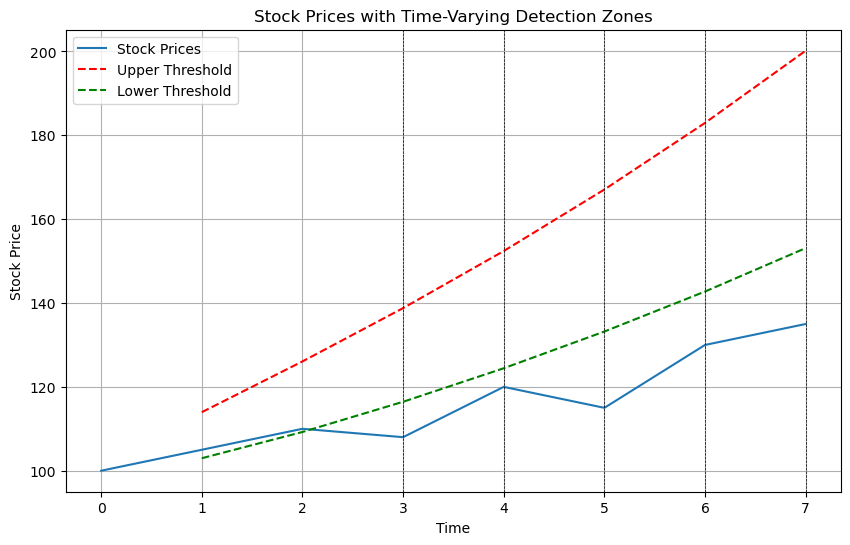

Detection times: [3, 4, 5, 6, 7]


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent):
    """
    Calculate the upper and lower thresholds based on the theoretical log-normal distribution at each time step.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - t: Array of time points.
    - threshold_percent: The upper and lower percentile threshold for detection.
    
    Returns:
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    """
    upper_thresholds = np.zeros(len(t))
    lower_thresholds = np.zeros(len(t))
    
    for i in range(len(t)):
        mu_t = np.log(S0) + (mu - 0.5 * sigma**2) * t[i]
        sigma_t = sigma * np.sqrt(t[i])
        
        upper_thresholds[i] = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
        lower_thresholds[i] = stats.lognorm.ppf(threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
    
    return upper_thresholds, lower_thresholds

def detect_abnormality(S, upper_thresholds, lower_thresholds):
    """
    Detect the time points where the stock price goes into the detection zone.
    
    Parameters:
    - S: Array of simulated stock prices.
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    
    Returns:
    - detection_info: List of dictionaries with detection time, recent texts, and price difference details.
    """
    detection_info = []
    n = len(S)
    
    # Detect abnormal levels
    for i in range(n):
        if S[i] >= upper_thresholds[i] or S[i] <= lower_thresholds[i]:
            if S[i] >= upper_thresholds[i]:
                difference = S[i] - upper_thresholds[i]
                boundary = 'upper'
            else:
                difference = S[i] - lower_thresholds[i]
                boundary = 'lower'
            detection_info.append({
                'time': i,
                'price': S[i],
                'boundary': boundary,
                'difference': difference,
            })
    
    return detection_info

# User inputs
stock_prices = np.array([100, 105, 110, 108, 120, 115, 130, 135])  # Example stock prices
text_data = [
    (1, "Company announces new product."),
    (2, "Quarterly earnings report released."),
    (3, "CEO interview about future plans."),
    (4, "New partnership with another company."),
    (5, "Market analysis report."),
    (6, "Product recall due to defects."),
]  # Example texts with timestamps

# Parameters
S0 = stock_prices[0]       # Initial stock price
mu = 0.1                   # Drift coefficient (example value, can be adjusted)
sigma = 0.2                # Volatility coefficient (example value, can be adjusted)
T = len(stock_prices) - 1  # Time horizon based on the length of stock prices
dt = 1                     # Time step size (assuming one time unit per step)
threshold_percent = 80     # Upper 40% and lower 40% detection zones
num_recent_texts = 3       # Number of recent texts to retrieve

# Time array
t = np.arange(0, T+1, dt)

# Calculate theoretical thresholds at each time step
upper_thresholds, lower_thresholds = calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent)

# Detect abnormality
detection_info = detect_abnormality(stock_prices, upper_thresholds, lower_thresholds)

# Retrieve most recent texts at detected abnormal times and add to detection_info
for info in detection_info:
    dt = info['time']
    recent_texts = [text for time, text in text_data if time <= t[dt]]
    recent_texts = recent_texts[-num_recent_texts:]  # Get the last num_recent_texts texts
    info['recent_texts'] = recent_texts

# Display detection information
for info in detection_info:
    print(f"Abnormality detected at time {info['time']}")
    print(f"Stock price: {info['price']}")
    print(f"Boundary: {info['boundary']}")
    print(f"Difference from boundary: {info['difference']}")
    print("Recent texts:")
    for rt in info['recent_texts']:
        print(f" - {rt}")
    print()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, stock_prices, lw=1.5, label='Stock Prices')
plt.plot(t, upper_thresholds, 'r--', label='Upper Threshold')
plt.plot(t, lower_thresholds, 'g--', label='Lower Threshold')
for info in detection_info:
    plt.axvline(t[info['time']], color='k', linestyle='--', lw=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices with Time-Varying Detection Zones')
plt.grid(True)
plt.show()

# Print detection times
print("Detection times:", [info['time'] for info in detection_info])


#### Sorted Texts, Counts, Difference

In [49]:
from collections import defaultdict
detection_info_sorted = sorted(detection_info, key=lambda x: abs(x['difference']), reverse=True)

# Count occurrences of each text in the sorted detection info
text_counts = defaultdict(int)
for info in detection_info_sorted:
    for text in info['recent_texts']:
        text_counts[text] += 1

# Display sorted detection information and text counts
print("Sorted Detection Information:")
for info in detection_info_sorted:
    print(f"Abnormality detected at time {info['time']}")
    print(f"Stock price: {info['price']}")
    print(f"Boundary: {info['boundary']}")
    print(f"Difference from boundary: {info['difference']}")
    print("Recent texts:")
    for text in info['recent_texts']:
        print(f" - {text}")
    print()

print("\nText Occurrence Counts:")
for text, count in text_counts.items():
    print(f"Text: {text}, Count: {count}")

Sorted Detection Information:
Abnormality detected at time 5
Stock price: 115
Boundary: lower
Difference from boundary: -18.202418797956682
Recent texts:
 - CEO interview about future plans.
 - New partnership with another company.
 - Market analysis report.

Abnormality detected at time 7
Stock price: 135
Boundary: lower
Difference from boundary: -18.103092233151358
Recent texts:
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 6
Stock price: 130
Boundary: lower
Difference from boundary: -12.744448753578553
Recent texts:
 - New partnership with another company.
 - Market analysis report.
 - Product recall due to defects.

Abnormality detected at time 3
Stock price: 108
Boundary: lower
Difference from boundary: -8.443732683097608
Recent texts:
 - Company announces new product.
 - Quarterly earnings report released.
 - CEO interview about future plans.

Abnormality detected at time 4
Stock price: 120
Boun

#### Unique Senteces

In [27]:
a=[]
b=[]
for i in range(len(detection_info)):
    a.append(detection_info[i]['recent_texts'])
    
for i in range(len(a)):
    b+=a[i]
list(set(b))

['Market analysis report.',
 'New partnership with another company.',
 'Product recall due to defects.',
 'CEO interview about future plans.']

# [Ans] A Dynamical Weighted Solution with Reordering

### Detection Method

Abnormality detected at time 2
Stock price: 55
Boundary: lower
Difference from boundary: -54.23623210800423
Recent texts:
 - I love Columbia University. 
 - Current market is undetermined by the wars occurred at the middle east, we need more action from the government.
 - The Government gives weapons to Iran to finalize the war.

Abnormality detected at time 3
Stock price: 90
Boundary: lower
Difference from boundary: -26.443732683097608
Recent texts:
 - Current market is undetermined by the wars occurred at the middle east, we need more action from the government.
 - The Government gives weapons to Iran to finalize the war.
 - The terrorists are being destroyed.



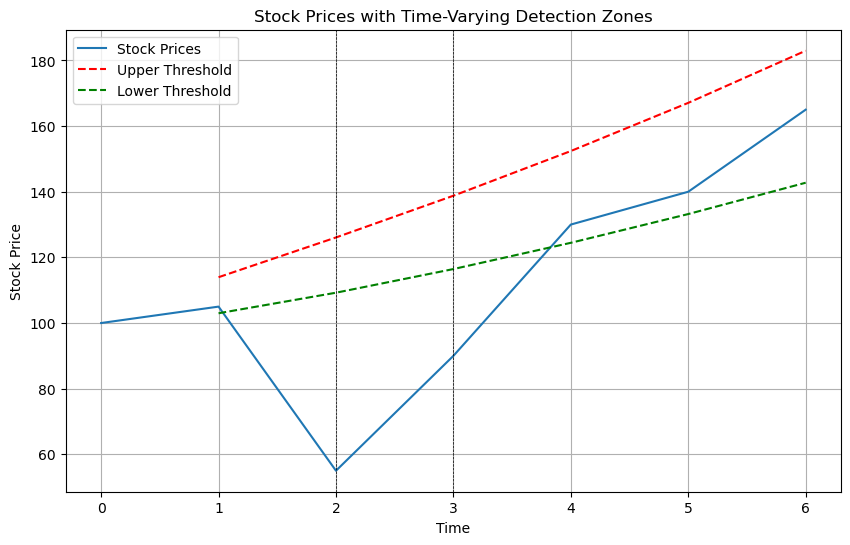

Detection times: [2, 3]


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent):
    """
    Calculate the upper and lower thresholds based on the theoretical log-normal distribution at each time step.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - t: Array of time points.
    - threshold_percent: The upper and lower percentile threshold for detection.
    
    Returns:
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    """
    upper_thresholds = np.zeros(len(t))
    lower_thresholds = np.zeros(len(t))
    
    for i in range(len(t)):
        mu_t = np.log(S0) + (mu - 0.5 * sigma**2) * t[i]
        sigma_t = sigma * np.sqrt(t[i])
        
        upper_thresholds[i] = stats.lognorm.ppf(1 - threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
        lower_thresholds[i] = stats.lognorm.ppf(threshold_percent / 200, sigma_t, scale=np.exp(mu_t))
    
    return upper_thresholds, lower_thresholds

def detect_abnormality(S, upper_thresholds, lower_thresholds):
    """
    Detect the time points where the stock price goes into the detection zone.
    
    Parameters:
    - S: Array of simulated stock prices.
    - upper_thresholds: Array of upper threshold values for each time step.
    - lower_thresholds: Array of lower threshold values for each time step.
    
    Returns:
    - detection_info: List of dictionaries with detection time, recent texts, and price difference details.
    """
    detection_info = []
    n = len(S)
    
    # Detect abnormal levels
    for i in range(n):
        if S[i] >= upper_thresholds[i] or S[i] <= lower_thresholds[i]:
            if S[i] >= upper_thresholds[i]:
                difference = S[i] - upper_thresholds[i]
                boundary = 'upper'
            else:
                difference = S[i] - lower_thresholds[i]
                boundary = 'lower'
            detection_info.append({
                'time': i,
                'price': S[i],
                'boundary': boundary,
                'difference': difference,
            })
    
    return detection_info

# User inputs
stock_prices = np.array([100, 105, 55, 90, 130, 140, 165])  # Example stock prices
text_data = [
    (0, "I love Columbia University. "),
    (1, "Current market is undetermined by the wars occurred at the middle east, we need more action from the government."),
    (2, "The Government gives weapons to Iran to finalize the war."),
    (3, "The terrorists are being destroyed."),
    (4, "The oil company is stabilized."),
    (5, "The market returns to trust the oil stocks. "),
]  # Example texts with timestamps


# Parameters
S0 = stock_prices[0]       # Initial stock price
mu = 0.1                   # Drift coefficient (example value, can be adjusted)
sigma = 0.2                # Volatility coefficient (example value, can be adjusted)
T = len(stock_prices) - 1  # Time horizon based on the length of stock prices
dt = 1                     # Time step size (assuming one time unit per step)
threshold_percent = 80     # Upper 40% and lower 40% detection zones
num_recent_texts = 3       # Number of recent texts to retrieve

# Time array
t = np.arange(0, T+1, dt)

# Calculate theoretical thresholds at each time step
upper_thresholds, lower_thresholds = calculate_log_normal_thresholds(S0, mu, sigma, t, threshold_percent)

# Detect abnormality
detection_info = detect_abnormality(stock_prices, upper_thresholds, lower_thresholds)

# Retrieve most recent texts at detected abnormal times and add to detection_info
for info in detection_info:
    dt = info['time']
    recent_texts = [text for time, text in text_data if time <= t[dt]]
    recent_texts = recent_texts[-num_recent_texts:]  # Get the last num_recent_texts texts
    info['recent_texts'] = recent_texts

# Display detection information
for info in detection_info:
    print(f"Abnormality detected at time {info['time']}")
    print(f"Stock price: {info['price']}")
    print(f"Boundary: {info['boundary']}")
    print(f"Difference from boundary: {info['difference']}")
    print("Recent texts:")
    for rt in info['recent_texts']:
        print(f" - {rt}")
    print()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, stock_prices, lw=1.5, label='Stock Prices')
plt.plot(t, upper_thresholds, 'r--', label='Upper Threshold')
plt.plot(t, lower_thresholds, 'g--', label='Lower Threshold')
for info in detection_info:
    plt.axvline(t[info['time']], color='k', linestyle='--', lw=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices with Time-Varying Detection Zones')
plt.grid(True)
plt.show()

# Print detection times
print("Detection times:", [info['time'] for info in detection_info])


### Sort

In [100]:
from collections import defaultdict
detection_info_sorted = sorted(detection_info, key=lambda x: abs(x['difference']), reverse=True)

# Count occurrences of each text in the sorted detection info
text_counts = defaultdict(int)
for info in detection_info_sorted:
    for text in info['recent_texts']:
        text_counts[text] += 1

# Display sorted detection information and text counts
print("Sorted Detection Information:")
for info in detection_info_sorted:
    print(f"Abnormality detected at time {info['time']}")
    print(f"Stock price: {info['price']}")
    print(f"Boundary: {info['boundary']}")
    print(f"Difference from boundary: {info['difference']}")
    print("Recent texts:")
    for text in info['recent_texts']:
        print(f" - {text}")
    print()

print("\nText Occurrence Counts:")
for text, count in text_counts.items():
    print(f"Text: {text}, Count: {count}")

Sorted Detection Information:
Abnormality detected at time 2
Stock price: 55
Boundary: lower
Difference from boundary: -54.23623210800423
Recent texts:
 - I love Columbia University. 
 - Current market is undetermined by the wars occurred at the middle east, we need more action from the government.
 - The Government gives weapons to Iran to finalize the war.

Abnormality detected at time 3
Stock price: 90
Boundary: lower
Difference from boundary: -26.443732683097608
Recent texts:
 - Current market is undetermined by the wars occurred at the middle east, we need more action from the government.
 - The Government gives weapons to Iran to finalize the war.
 - The terrorists are being destroyed.


Text Occurrence Counts:
Text: I love Columbia University. , Count: 1
Text: Current market is undetermined by the wars occurred at the middle east, we need more action from the government., Count: 2
Text: The Government gives weapons to Iran to finalize the war., Count: 2
Text: The terrorists are 

### Important Scores

In [101]:
from collections import defaultdict

# Count occurrences of each text and sum of absolute differences
text_counts = defaultdict(int)
text_differences = defaultdict(float)

for info in detection_info:
    for text in info['recent_texts']:
        text_counts[text] += 1
        text_differences[text] += abs(info['difference'])

# Calculate scores by multiplying counts and differences
text_scores = {text: text_counts[text] * text_differences[text] for text in text_counts}

# Sort the scores in descending order
sorted_text_scores = sorted(text_scores.items(), key=lambda item: item[1], reverse=True)

# Display the sorted text scores
print("Sorted Text Scores:")
for text, score in sorted_text_scores:
    print(f"Text: {text}, Score: {score}")



Sorted Text Scores:
Text: Current market is undetermined by the wars occurred at the middle east, we need more action from the government., Score: 161.35992958220368
Text: The Government gives weapons to Iran to finalize the war., Score: 161.35992958220368
Text: I love Columbia University. , Score: 54.23623210800423
Text: The terrorists are being destroyed., Score: 26.443732683097608


### Reordering

In [102]:
sens = []
for i in range(len(sorted_text_scores)):
    sens.append(sorted_text_scores[i][0])
sens

['Current market is undetermined by the wars occurred at the middle east, we need more action from the government.',
 'The Government gives weapons to Iran to finalize the war.',
 'I love Columbia University. ',
 'The terrorists are being destroyed.']

In [103]:
# 1
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.linalg import svd
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def weight_embeddings(embeddings, context_vector):
    # Calculate cosine similarity with the context vector
    similarities = cosine_similarity(embeddings, context_vector.reshape(1, -1)).flatten()
    # Normalize similarities to use as weights
    weights = similarities / np.sum(similarities)
    # Weight the embeddings
    weighted_embeddings = embeddings * weights[:, np.newaxis]
    return weighted_embeddings

def update_singular_values_with_weights(initial_paragraph, new_paragraphs, context):
    # Initialize the list of singular values for each sentence
    singular_values_over_time = []

    # Encode the context vector
    context_vector = model.encode(context).reshape(1, -1)

    # Start with the initial paragraph
    current_text = initial_paragraph
    sentences = current_text.split('. ')
    sentences = [s.strip() for s in sentences if s]
    
    # Encode the initial sentences
    embeddings = model.encode(sentences)
    
    # Weight the embeddings
    weighted_embeddings = weight_embeddings(embeddings, context_vector)

    # Perform SVD on the weighted embedding
    U, Sigma, Vt = svd(weighted_embeddings, full_matrices=False)
    
    # Store the initial singular values for each sentence
    for sigma in Sigma:
        singular_values_over_time.append([sigma])

    # Iterate over the new paragraphs and update the text and singular values
    for paragraph in new_paragraphs:
        # Add the new paragraph to the current text
        current_text += ' ' + paragraph
        sentences = current_text.split('. ')
        sentences = [s.strip() for s in sentences if s]

        # Encode the updated sentences
        embeddings = model.encode(sentences)
        
        # Weight the embeddings
        weighted_embeddings = weight_embeddings(embeddings, context_vector)

        # Perform SVD on the weighted embedding matrix
        U, Sigma, Vt = svd(weighted_embeddings, full_matrices=False)

        # Update the singular values for each sentence
        for i, sigma in enumerate(Sigma):
            if i < len(singular_values_over_time):
                singular_values_over_time[i].append(sigma)
            else:
                singular_values_over_time.append([sigma])

    return singular_values_over_time

# Example usage
initial_paragraph = sens[0]
new_paragraphs = [
    i for i in sens[1:]
]
context = sorted_text_scores[0][0]

singular_values = update_singular_values_with_weights(initial_paragraph, new_paragraphs, context)

# Print the singular values over time
for t, sv in enumerate(singular_values):
    print(f"Singular values for sentence {t}: {sv}")


Singular values for sentence 0: [0.99999994, 0.70873094, 0.7629475, 0.6124031]
Singular values for sentence 1: [0.267489, 0.28314564, 0.23406231]
Singular values for sentence 2: [0.070518754, 0.17756213]
Singular values for sentence 3: [0.055992153]


### Only important left with SV with time f(T)

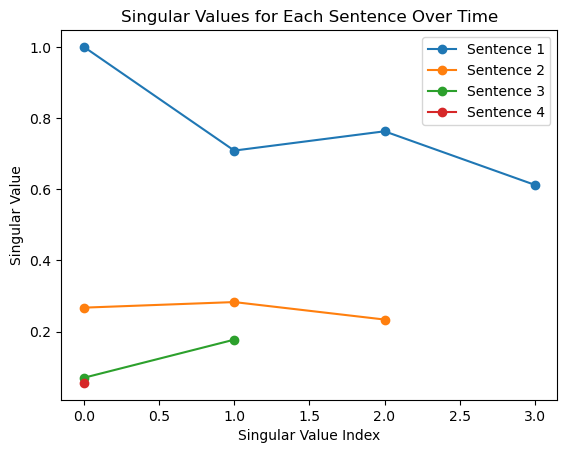

In [104]:
# 2
sv = []
for i in range(len(singular_values)):
    sv.append(singular_values[i])
sv

import matplotlib.pyplot as plt

# Singular values for each sentence over time

singular_values = sv

# Plot singular values for each sentence
for i, sv in enumerate(singular_values):
    plt.plot(range(len(sv)), sv, marker='o', label=f'Sentence {i+1}')

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values for Each Sentence Over Time')
plt.legend()
plt.show()



#### Importance Scores

Now we have the counts for each sentence and absolute value from boundary of each sentences. We mutiply them together, then we get a score for each sentence stored in a dictionary with sorted score.

In [137]:
from collections import defaultdict

# Provided detection information
# detection_info = [
#     {'time': 3,
#      'price': 108,
#      'boundary': 'lower',
#      'difference': -3.2401370054396637,
#      'recent_texts': ['Quarterly earnings report released.',
#                       'CEO interview about future plans.',
#                       'New partnership with another company.',
#                       'Market analysis report.',
#                       'Product recall due to defects.']},
#     {'time': 5,
#      'price': 115,
#      'boundary': 'lower',
#      'difference': -10.568275029807154,
#      'recent_texts': ['Quarterly earnings report released.',
#                       'CEO interview about future plans.',
#                       'New partnership with another company.',
#                       'Market analysis report.',
#                       'Product recall due to defects.']},
#     {'time': 6,
#      'price': 130,
#      'boundary': 'lower',
#      'difference': -3.807537469224002,
#      'recent_texts': ['Quarterly earnings report released.',
#                       'CEO interview about future plans.',
#                       'New partnership with another company.',
#                       'Market analysis report.',
#                       'Product recall due to defects.']},
#     {'time': 7,
#      'price': 135,
#      'boundary': 'lower',
#      'difference': -7.7761130213563945,
#      'recent_texts': ['Quarterly earnings report released.',
#                       'CEO interview about future plans.',
#                       'New partnership with another company.',
#                       'Market analysis report.',
#                       'Product recall due to defects.']}
# ]

# Count occurrences of each text and sum of absolute differences
text_counts = defaultdict(int)
text_differences = defaultdict(float)

for info in detection_info:
    for text in info['recent_texts']:
        text_counts[text] += 1
        text_differences[text] += (info['difference']) # Abs or not

# Calculate scores by multiplying counts and differences
text_scores = {text: text_counts[text] * text_differences[text] for text in text_counts}

# Sort the scores in descending order
sorted_text_scores = sorted(text_scores.items(), key=lambda item: item[1], reverse=True)

# Display the sorted text scores
print("Sorted Text Scores:")
for text, score in sorted_text_scores:
    print(f"Text: {text}, Score: {score}")



Sorted Text Scores:
Text: The terrorists are being destroyed., Score: -26.443732683097608
Text: I love Columbia University. , Score: -54.23623210800423
Text: Current market is undetermined by the wars occurred at the middle east, we need more action from the government., Score: -161.35992958220368
Text: The Government gives weapons to Iran to finalize the war., Score: -161.35992958220368


## [Done by Song]****[Matching the Important score to text transforming similar sentence into $b(f(T),P_t,t),s(f(T),P_t,t)$]

Now, the important texts haven been transformed into $f(T)$ by Dynamical Weighted Solution with Reordering. The $f(T)$ shows the important texts and their characteristics as time changes. We can based on the GBM,


$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $

where:
- $ S_t $ is the stock price at time $ t $,
- $ \mu $ is the drift coefficient (expected return),
- $ \sigma $ is the volatility coefficient,
- $ W_t $ is a standard Brownian motion or Wiener process,

and iterative solution

$S_{t+\delta t} = S_t \exp\left((\mu - 0.5\sigma^2) \delta t + \sigma \delta W_t\right)$

and importance score to match them. 


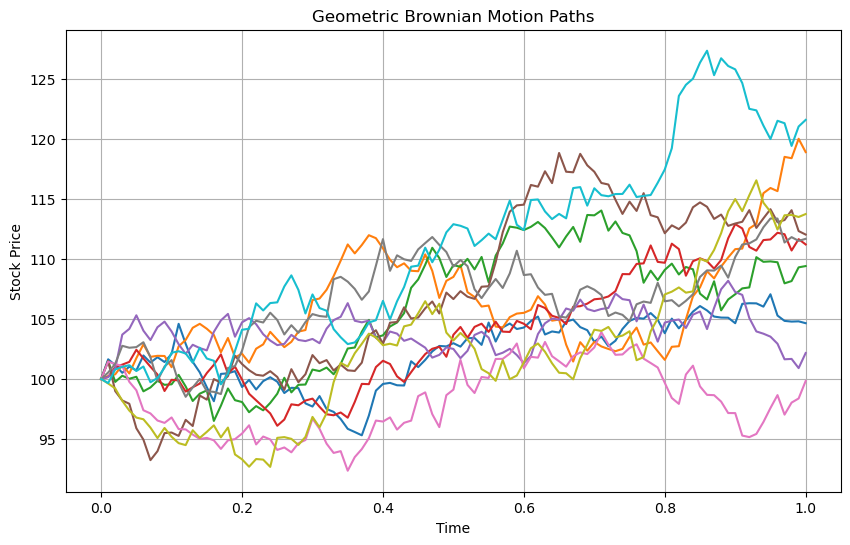

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt, n_paths):
    """
    Simulate geometric Brownian motion (GBM) paths.
    
    Parameters:
    - S0: Initial stock price.
    - mu: Drift coefficient.
    - sigma: Volatility coefficient.
    - T: Time horizon.
    - dt: Time step size.
    - n_paths: Number of simulation paths.
    
    Returns:
    - t: Array of time points.
    - S: Array of simulated paths.
    """
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps + 1)
    S = np.zeros((n_steps + 1, n_paths))
    S[0] = S0
    
    for i in range(1, n_steps + 1):
        Z = np.random.normal(0, np.sqrt(dt), n_paths)  # dW_t ~ N(0, (dt))
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * Z)
    
    return t, S

# Parameters
S0 = 100       # Initial stock price
mu = 0.1       # Drift coefficient
sigma = 0.1    # Volatility coefficient
T = 1.0        # Time horizon (1 year)
dt = 0.01      # Time step size
n_paths = 10   # Number of simulation paths

# Simulate GBM
t, S = simulate_gbm(S0, mu, sigma, T, dt, n_paths)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, S[:, i], lw=1.5)
plt.title('Geometric Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


We play the code above and see that the $\mu, \sigma$ determine the trend of trajectories. So, the importance scores should relates to the $\mu, \sigma$.

Actually, the trajactories are described as 

$S_t = S_0 \exp\left((\mu - 0.5\sigma^2)  t + \sigma  W_t\right)$

with 

$\limsup_{t\to \infty} \frac{W_t}{\sqrt{2t \ln(\ln(t))}} = 1$ a.s.

so, $e^{\sigma W_t}=e^{\sigma \sqrt{2t \ln(\ln(t))}}$ as $t\to \infty$.

If $\mu > \sigma^2/2$, $S_t\to \infty$ as $t\to \infty$.

If $\mu < \sigma^2/2$, $S_t\to 0$ as $t\to \infty$.

If $\mu = \sigma^2/2$, $S_t$ fluctuates in $t \in (0,\infty)$. 

And, $\mathbb{E}(S_t)\to \infty, S_t\to 0$ a.s.

## Matching

#### The Rule
Clearly, $f(T)$ determines $\mu, \sigma$ to some extend so that the SDE can be changed by input text. We remind that the $f(T)$ gives characteristics of texts. And, if we get measures out of boundary, it can be caused by that $10 \%$ or $f(T)$. Based on LLN, in $100$ samples, $90$ ins, $10$ outs on average. So, if we sampled from history get $80$ ins, $20$ outs on average, the extra $10$ is caused by $f(T)$.


# Remark
As I want to match the evolution of probability using Fokker-Plank, I may match them perfectly by minimizing the loss function of the density. 

I also give a higher moments method for comparison.

## 1: Fokker-Plank Transition Density

## Fitting History Data

This approach involves leveraging the properties of the differential operator and the boundary conditions to minimize the discrepancy between the modeled and observed transition densities. Here’s how you can conceptualize and construct such a loss function:

### Conceptual Approach

1. **Define the Fokker-Planck Operator**:
   $
   \mathcal{L}_x^* p = -\nabla \cdot (b(x, t) p) + \nabla^2 : (a(x, t) p).
   $

2. **Green's Function Representation**:
   The transition density $ p(x, t | y, s) $ should satisfy:
   $
   \partial_t p = \mathcal{L}_x^* p.
   $
   With the initial condition:
   $
   p(x, s | y, s) = \delta(x - y).
   $

3. **Formulate the Loss Function**:
   The goal is to find the transition density $ p(x, t | y, s) $ that minimizes the discrepancy in the Fokker-Planck equation. The loss function can be constructed as the mean squared error (MSE) of the discrepancy:
   $
   \text{Loss} = \int \left| \partial_t p(x, t | y, s) - \mathcal{L}_x^* p(x, t | y, s) \right|^2 dx.
   $
   This loss function penalizes deviations from the expected evolution of the transition density.

### Practical Implementation

Here’s a step-by-step outline for deriving and implementing the loss function:

1. **Numerical Approximation**:
   Discretize the time and space to compute the partial derivatives and the Fokker-Planck operator.

2. **Compute the Discrepancy**:
   At each time step, compute the discrepancy between the time derivative of the transition density and the Fokker-Planck operator applied to the transition density.

3. **Integrate the Loss**:
   Integrate the squared discrepancy over the spatial domain to form the loss function.

### Example Implementation in Python


In [176]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import simps

# Define the grid and time steps
x_grid = np.linspace(-5, 5, 100)  # spatial grid
t_grid = np.linspace(0, 1, 50)    # time grid
dx = x_grid[1] - x_grid[0]
dt = t_grid[1] - t_grid[0]

# Define the drift and diffusion functions (initial guess)
def b(x, t, params):
    return params[0] * x

def sigma(x, t, params):
    return params[1]

def a(x, t, params):
    return sigma(x, t, params) ** 2 / 2

# Initialize the transition density p(x, t | y, s)
p = np.zeros((len(t_grid), len(x_grid), len(x_grid)))

# Initial condition: Dirac delta function approximated by a narrow Gaussian
for i, x in enumerate(x_grid):
    p[0, i, :] = np.exp(-(x_grid - x)**2 / (2 * 0.01)) / (np.sqrt(2 * np.pi * 0.01))

# Compute the loss function
def compute_loss(params, p, x_grid, t_grid):
    loss = 0
    for n in range(1, len(t_grid)):
        dp_dt = (p[n, :, :] - p[n-1, :, :]) / dt
        for i, x in enumerate(x_grid):
            Lp = -np.gradient(b(x, t_grid[n], params) * p[n, i, :], dx) + np.gradient(np.gradient(a(x, t_grid[n], params) * p[n, i, :], dx), dx)
            discrepancy = dp_dt[:, i] - Lp
            loss += simps(discrepancy**2, x_grid)
    return loss

# Initial guess for parameters
initial_params = [0.1, 0.2]

# Optimize the parameters to match the empirical paths
result = minimize(compute_loss, initial_params, args=(p, x_grid, t_grid), method='L-BFGS-B')
optimized_params = result.x

print(f"Optimized parameters: {optimized_params}")
print(f"Loss: {result.fun}")


Optimized parameters: [0.1 0.2]
Loss: 669263.8512528365


# Loss is not so desirable [Question in approximating near Dirac]


### Notes

1. **Numerical Stability**:
   Ensure that the numerical scheme is stable. You may need to adjust the grid size \( dx \) and time step \( dt \).

2. **Optimization**:
   If you aim to optimize parameters of the SDE (e.g., \( b(x, t) \) and \( \sigma(x, t) \)), you can define an optimization routine that adjusts these parameters to minimize the loss.

3. **Initial Condition**:
   The Dirac delta function is approximated by a narrow Gaussian. For better approximation, ensure the width of the Gaussian is small.

### Summary

By constructing a loss function based on the discrepancy between the modeled and actual transition densities, and leveraging the Green's function approach, you can derive an effective method to approximate the transition density. This approach is powerful for cases where the exact transition density is unknown, but you have path realizations or boundary conditions.


### After you have the SDE, you can use simple minimization method for finding $\{\alpha_i, \beta_i\}_i$ in 
<center>$dP_t = (\sum_i \alpha_i I_i)b(P_t,t)dt+(\sum_i \beta_i I_i)\sigma(P_t,t)dW_t$.
    
### Then, our SDE fits the real SDE. The work of leveraging the $\{I_i\}_i$ for text characteristics into the SDE is done. 

## 2: higher moments method

### Expectation

In [179]:
import numpy as np
from scipy.optimize import minimize

# Example empirical path data
empirical_paths = np.random.randn(100, 50)  # 100 paths, 50 time steps each

# Define the SDE
def sde_model(params, t, x):
    mu, sigma = params
    dt = t[1] - t[0]
    dW = np.random.normal(0, np.sqrt(dt), size=x.shape)
    return x + mu * dt + sigma * dW

# Loss function to minimize
def loss_function(params, empirical_paths):
    n_paths, n_steps = empirical_paths.shape
    t = np.linspace(0, 1, n_steps)
    x = np.zeros_like(empirical_paths)
    for i in range(1, n_steps):
        x[:, i] = sde_model(params, t[i-1:i+1], x[:, i-1])
    return np.mean((empirical_paths - x) ** 2)

# Initial guess for parameters
initial_params = [0.0, 1.0]

# Optimize the parameters to match the empirical paths
result = minimize(loss_function, initial_params, args=(empirical_paths))
optimized_params = result.x

print(f"Optimized parameters: {optimized_params}")


Optimized parameters: [2.33644303e-05 1.00001159e+00]


### Higher Moments

In [180]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import skew, kurtosis

# Example empirical path data
empirical_paths = np.random.randn(100, 50)  # 100 paths, 50 time steps each

# Define the SDE
def sde_model(params, t, x):
    mu, sigma = params
    dt = t[1] - t[0]
    dW = np.random.normal(0, np.sqrt(dt), size=x.shape)
    return x + mu * dt + sigma * dW

# Loss function to minimize
def loss_function(params, empirical_paths):
    n_paths, n_steps = empirical_paths.shape
    t = np.linspace(0, 1, n_steps)
    x = np.zeros_like(empirical_paths)
    for i in range(1, n_steps):
        x[:, i] = sde_model(params, t[i-1:i+1], x[:, i-1])
    
    # Calculate moments for the empirical and generated paths
    empirical_mean = np.mean(empirical_paths, axis=0)
    generated_mean = np.mean(x, axis=0)
    
    empirical_var = np.var(empirical_paths, axis=0)
    generated_var = np.var(x, axis=0)
    
    empirical_skew = skew(empirical_paths, axis=0)
    generated_skew = skew(x, axis=0)
    
    empirical_kurt = kurtosis(empirical_paths, axis=0)
    generated_kurt = kurtosis(x, axis=0)
    
    # Define the loss function to include higher-order moments
    loss = np.mean((empirical_mean - generated_mean) ** 2) + \
           np.mean((empirical_var - generated_var) ** 2) + \
           np.mean((empirical_skew - generated_skew) ** 2) + \
           np.mean((empirical_kurt - generated_kurt) ** 2)
    
    return loss

# Initial guess for parameters
initial_params = [0.0, 1.0]

# Optimize the parameters to match the empirical paths
result = minimize(loss_function, initial_params, args=(empirical_paths))
optimized_params = result.x

print(f"Optimized parameters: {optimized_params}")


Optimized parameters: [0. 1.]


### This is weak but workable without the complex calculation and considering the singularity problem and numerical problem like stability near singularity. 

### After you have the SDE, you can use simple minimization method for finding $\{\alpha_i, \beta_i\}_i$ in 
<center>$dP_t = (\sum_i \alpha_i I_i)b(P_t,t)dt+(\sum_i \beta_i I_i)\sigma(P_t,t)dW_t$.
    
### Then, our SDE fits the real SDE. The work of leveraging the $\{I_i\}_i$ for text characteristics into the SDE is done. 